### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

# Set up format for visualisations.
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi=110)
mpl.rcParams["font.size"] = 18
plt.plot([1,2,3], label = 'label')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend()
plt.xticks()
plt.yticks()
plt.title('PLOT')
plt.gcf().set_tight_layout(True) # To prevent the xlabel being cut off
plt.show()

In [2]:
# Load the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Explore the data.
print(reviews.shape)
print(reviews.dtypes)

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [4]:
# Check for missing values?
reviews.isna().any()

gender                    False
age                       False
remuneration (k£)         False
spending_score (1-100)    False
loyalty_points            False
education                 False
language                  False
platform                  False
product                   False
review                    False
summary                   False
dtype: bool

In [5]:
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [6]:
print(reviews['gender'].unique())
print(reviews['education'].unique())
print(reviews['language'].unique())
print(reviews['platform'].unique())

['Male' 'Female']
['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']
['EN']
['Web']


In [7]:
reviews['product'].value_counts()

1012    13
1031    13
979     12
977     11
3498    10
        ..
1459     9
263      9
466      8
254      8
453      8
Name: product, Length: 200, dtype: int64

In [8]:
reviews['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [9]:
reviews['gender'].value_counts()

Female    1120
Male       880
Name: gender, dtype: int64

In [10]:
sample_reviews = reviews.sample(n=10)[['review','summary']]
pd.set_option('display.max_colwidth', None)
sample_reviews

review  \
629                                                                                                                                                                                                                                                               We used this for the week proceeding Easter and our kids looked forward to seeing what was in the next egg every night. It is a lovely tradition that instills the true meaning of Easter.   
981                                                                                                                                                                                                                                       We have Drizzt and enjoy playing it. Even our younger kids are able to join in. (They are ages 7 & 5). We haven't cracked this one open yet (Father's Day gift), but expect nothing less than an amazing fun time.   
863                                                           We were thrilled to find Acquire finally; my husband grew up loving this game. Ordered it for my brother.  The game requires strategy, planning, and never ends the same way.  It is a classic, must-have addition for any game closet.  It's a little more time intensive, and the board isn't as flashy as newer games, but hey -- it is exciting to play.  It's all about the acquisitions.   
476                                                                                                                                                                                                                                                                                                                Confusing instructions and its not for 6 year olds. Its boring too. Its asking the same question but each question is worded differently.   
1424                                                                                                                                          One word of caution: If you use either expansion, you have to mix together the items from the expansion with those of the base game, and then thoroughly remove them at the end. Also, the symbols for differentiating expansion items are not terribly visible, so you WILL miss some the first time through.   
1005                                                                                                                                                                                                                                                                                                                                                                                                                                       Great! Thank you.   
1947                                                                                                                                                                                                          After enjoying "Karma", I decided to get WordSpiel and Quiddler.  All three games are very different, and they're all a ton of fun.  The game designers put a lot of thought into the rules to produce really interesting and enjoyable games.   
1782  im not sure what i was expecting, but when i got this i was disappointed with the quality. each piece does not feel very sturdy. they are made out of red hard plastic with some magnets glued inside. i feel if one piece fell off a kitchen table onto a tile floor it would shatter. that hasn't happened yet, but its just what it feels like. the patterns you can make are pretty cool though, but i would like it if the magnets were stronger.   
1747                                                                                                                                                    Fantastic gift.  Originally purchased at FAO Schwarz for my son (now an electrical engineer) it became a favorite of my granddaughter who delighted in assembling, dropping and repeating this.  She first put it together at 4 and now at 6 wants another sim

## 2. Drop columns

In [11]:
# Drop unnecessary columns, all records with the same language and platform.
reviews = reviews.drop(['language','platform'], axis=1)

In [12]:
# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [13]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'remuneration',
                          'spending_score (1-100)':'spending_score'}, 
               inplace=True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4.a Save the DataFrame as a CSV file

In [14]:
# Create a CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [15]:
# Import new CSV file with Pandas.
df =  pd.read_csv('reviews_clean.csv')

# View DataFrame.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## 4.b explore the variables and their relationship.

In [16]:
# Look for correlation and linearity between numeric variables.
# Remove the product column.
df_subset = df.drop(['product'], axis=1)
df_subset.corr()

age  remuneration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
remuneration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

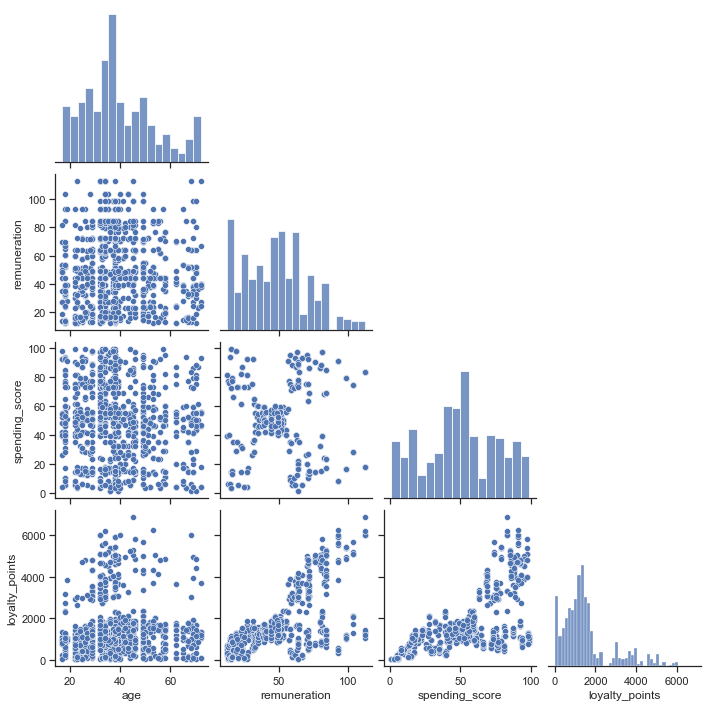

In [17]:
# Create a pairplot of numeric variables.
# Check linearity between variables and normal distribution of variables.
# Title cannot be added to a pairplot in Seaborn.
sns.set_theme(style='ticks')
sns.pairplot(df_subset, kind='scatter', corner=True, palette='colorblind')
plt.savefig('numerical_review')


In [18]:
# Set plot size.
from matplotlib import figure
f = figure.Figure( figsize =(7,7) )

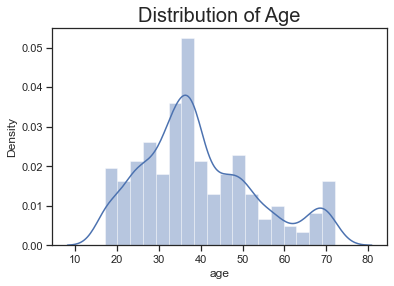

In [19]:
# Look into the age variable.
sns.set_theme(style='ticks')
f = figure.Figure( figsize =(7,7) )
a = df['age']
sns.distplot(a)
plt.title('Distribution of Age', fontsize=20)
plt.savefig('distribution of age')

In [20]:
# Look for the most relevant age group of customers.
a.value_counts().head(20)

38    180
49    120
34    110
29    110
32    110
37     90
39     80
18     80
33     80
45     60
25     60
36     50
23     50
22     50
46     50
69     40
58     40
53     40
26     40
70     30
Name: age, dtype: int64

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='age'>

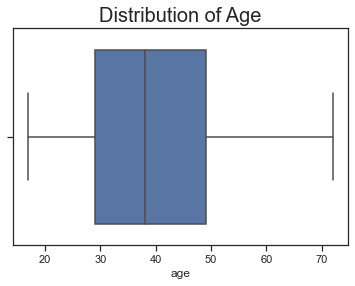

In [21]:
# Look at a boxplot of age distribution.
sns.set_theme(style='ticks')
plt.title('Distribution of Age', fontsize=20)
sns.boxplot(x=df['age'])

<AxesSubplot:title={'center':'Distribution of Remuneration'}, xlabel='remuneration', ylabel='Density'>

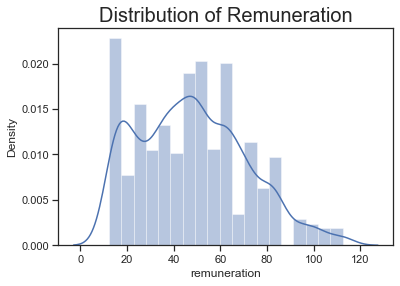

In [22]:
# Look into the remuneration variable.
sns.set_theme(style='ticks')
plt.title('Distribution of Remuneration', fontsize=20)
sns.distplot(df['remuneration'])

<AxesSubplot:title={'center':'Distribution of Remuneration'}, xlabel='remuneration'>

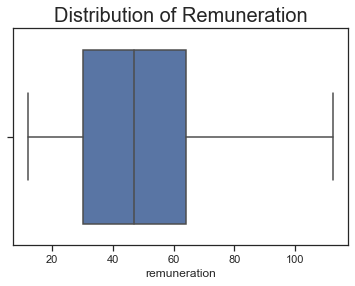

In [23]:
# Look at a boxplot.
sns.set_theme(style='ticks')
plt.title('Distribution of Remuneration', fontsize=20)
sns.boxplot(x=df['remuneration'])

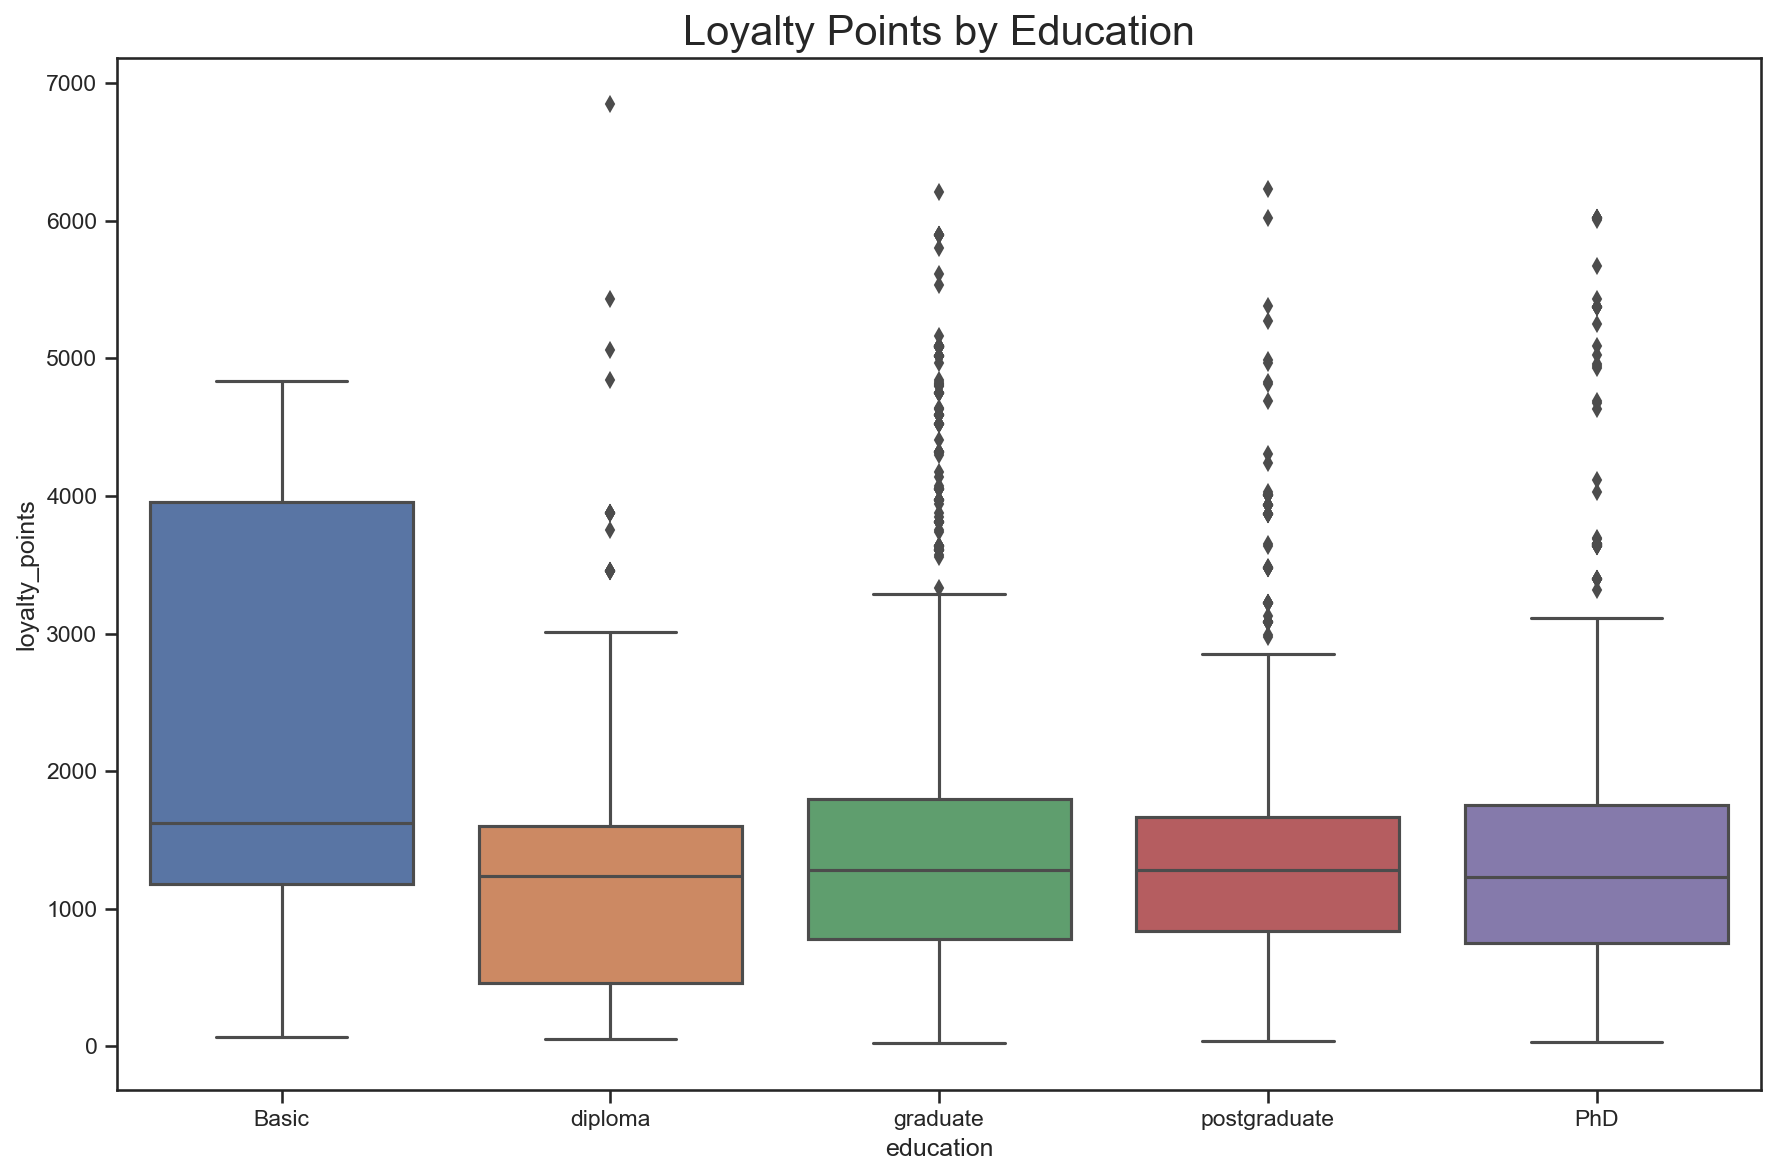

In [24]:
# Show loyalty points by education.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.title('Loyalty Points by Education', fontsize=20)
sns.boxplot(data=df, y='loyalty_points', x='education',
            order=["Basic","diploma","graduate","postgraduate", 'PhD'])
plt.savefig('Education and Loyalty')

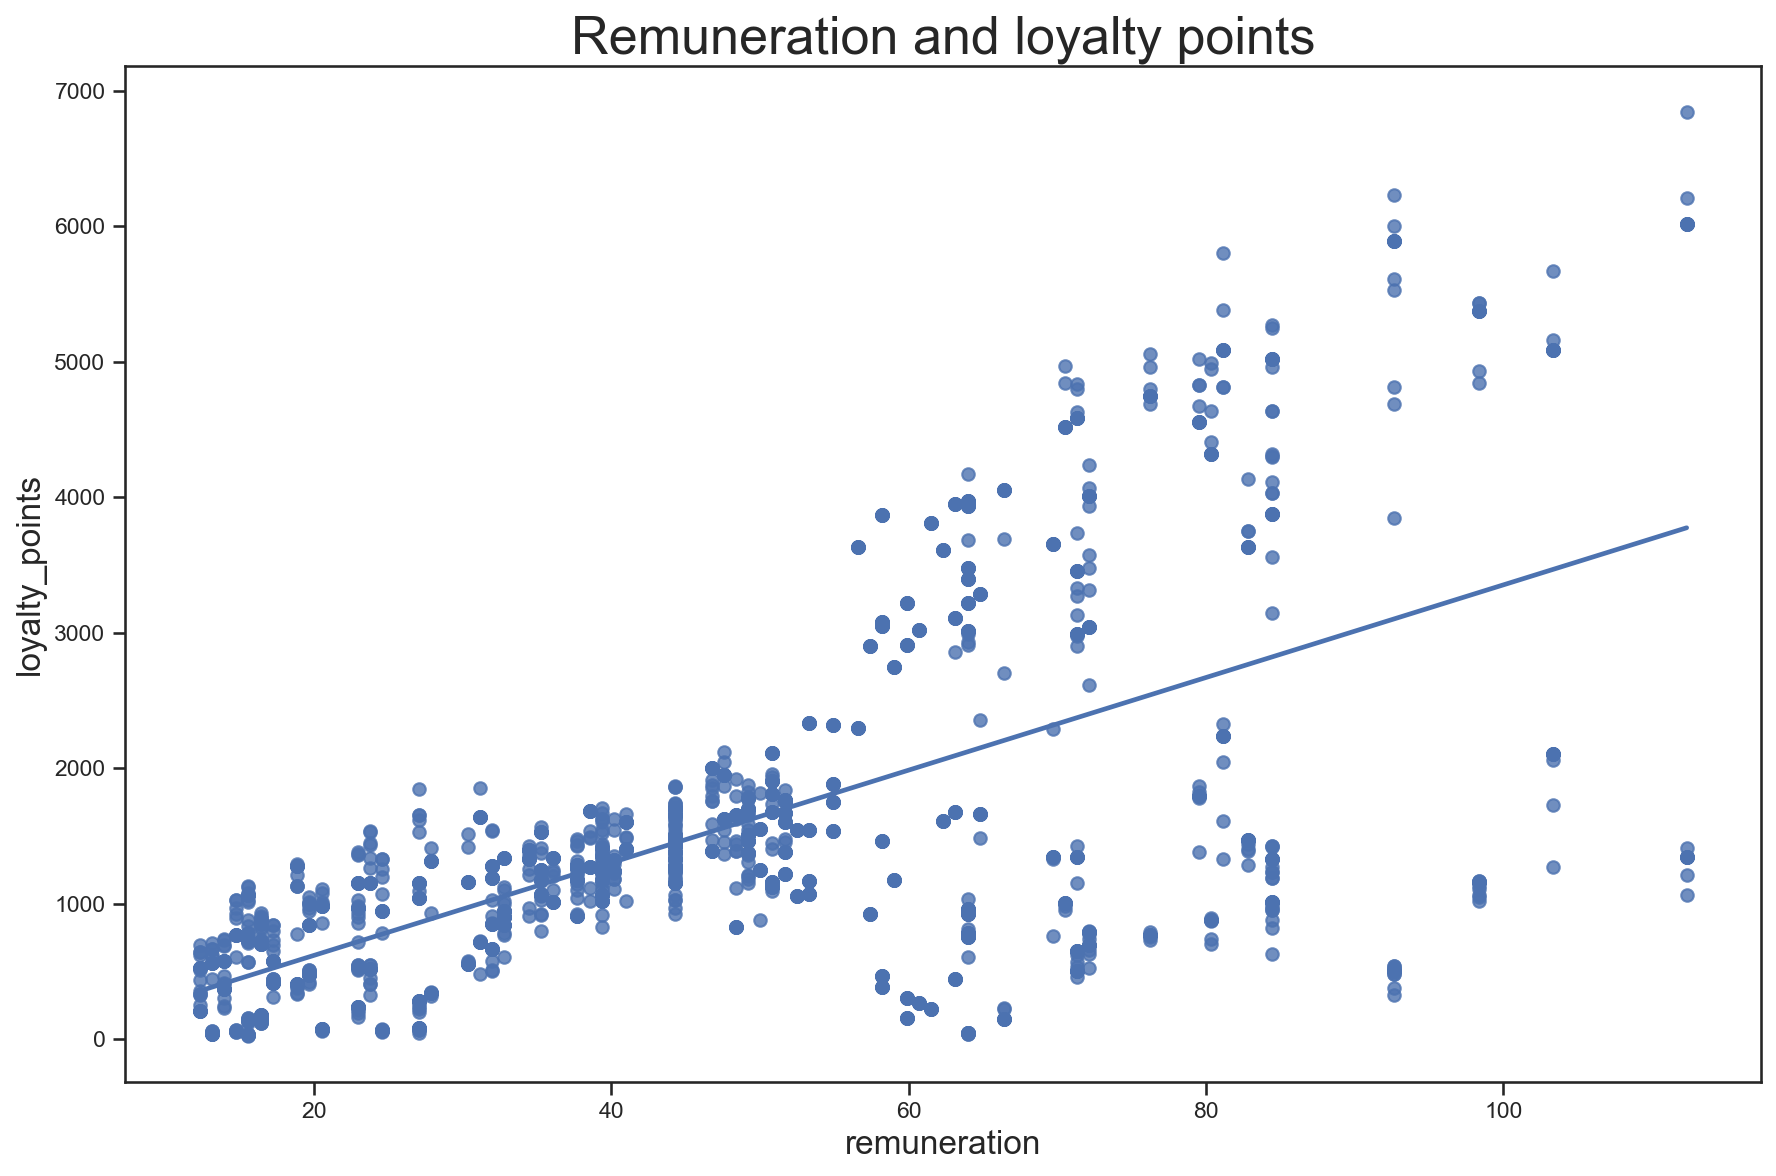

In [141]:
# Explore relationship between loyalty and remuneration.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.title('Remuneration and loyalty points', fontsize=25)
plt.xlabel('education', fontsize=16),
plt.ylabel('loyalty_points', fontsize=16),
sns.regplot(data=df, y='loyalty_points', x='remuneration', ci=None)
plt.savefig('Remuneration and Loyalty')

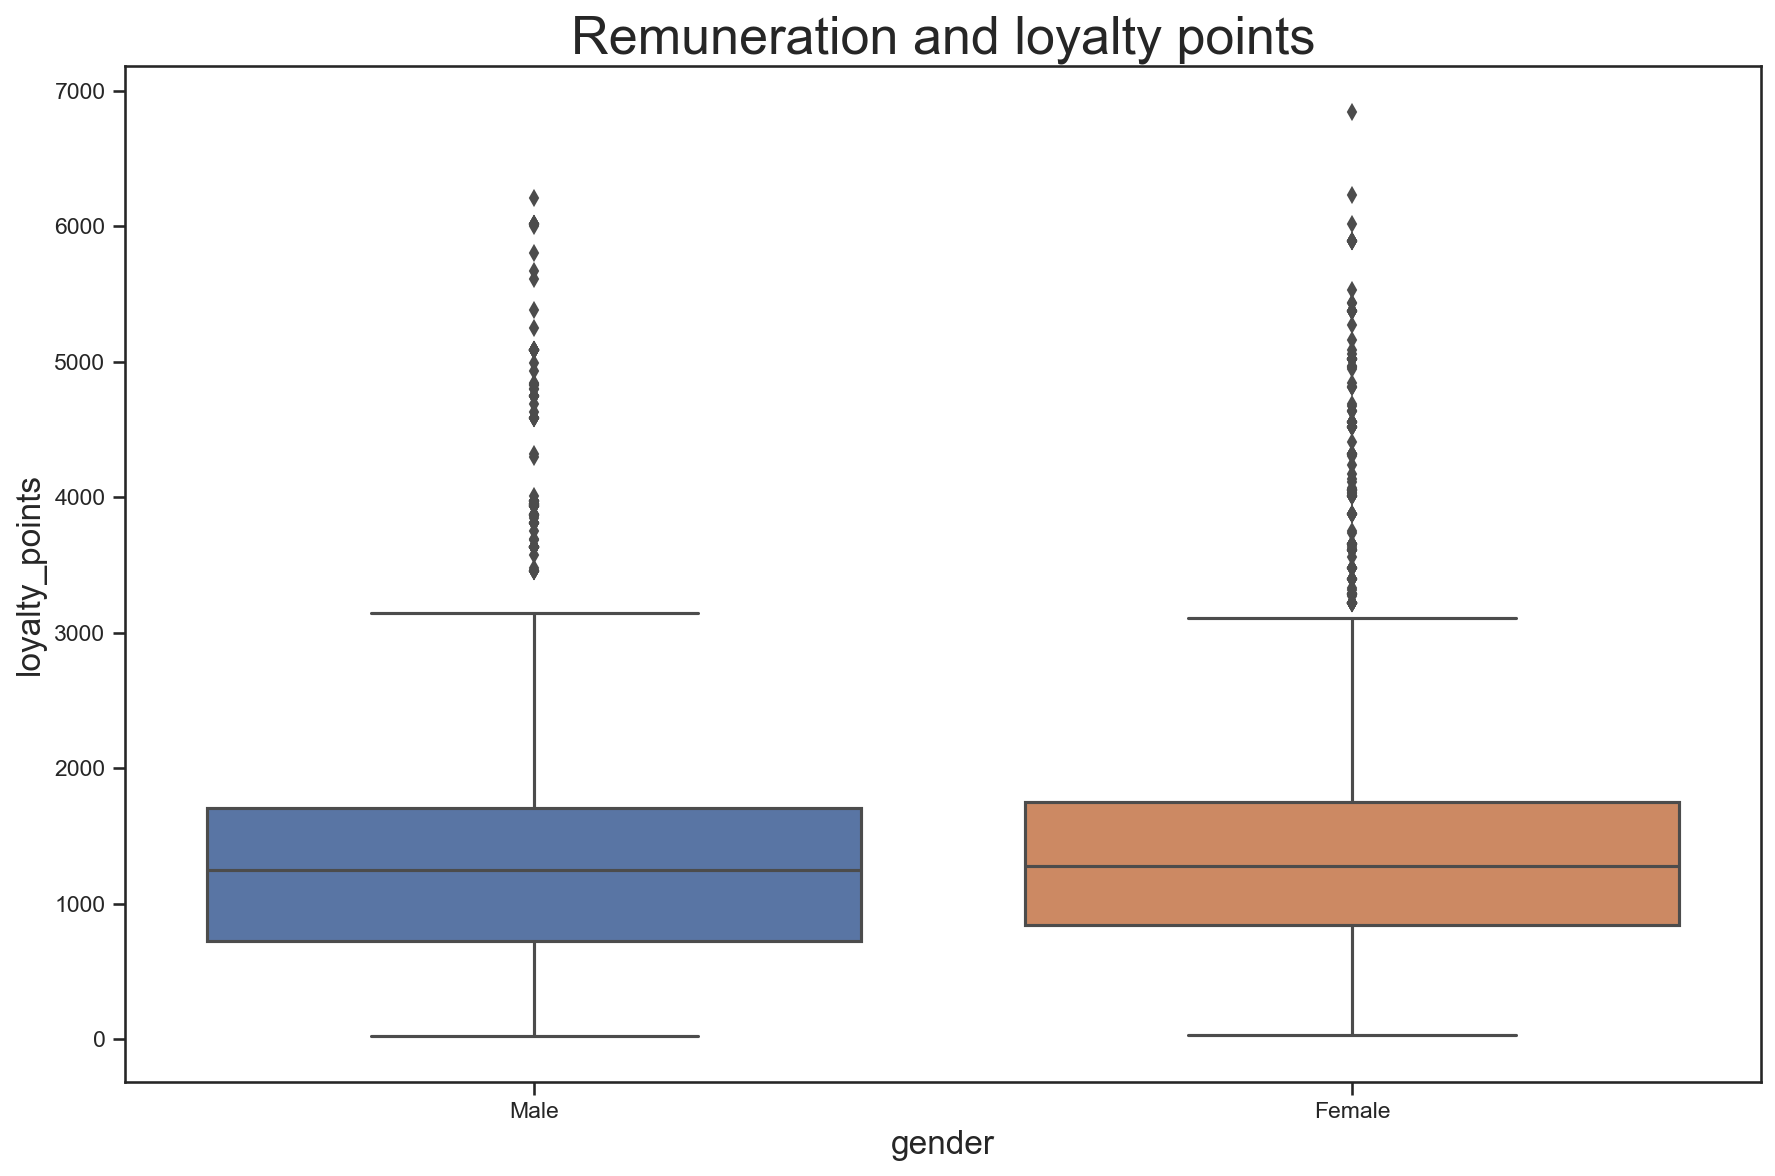

In [26]:
# Check if there is a relationship with categorical variables.
# Explore relationship between loyalty and remuneration.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.title('Remuneration and loyalty points', fontsize=25)
plt.xlabel('education', fontsize=16),
plt.ylabel('loyalty_points', fontsize=16),
sns.boxplot(data=df, y='loyalty_points', x='gender')
plt.savefig('Gender and loyalty')

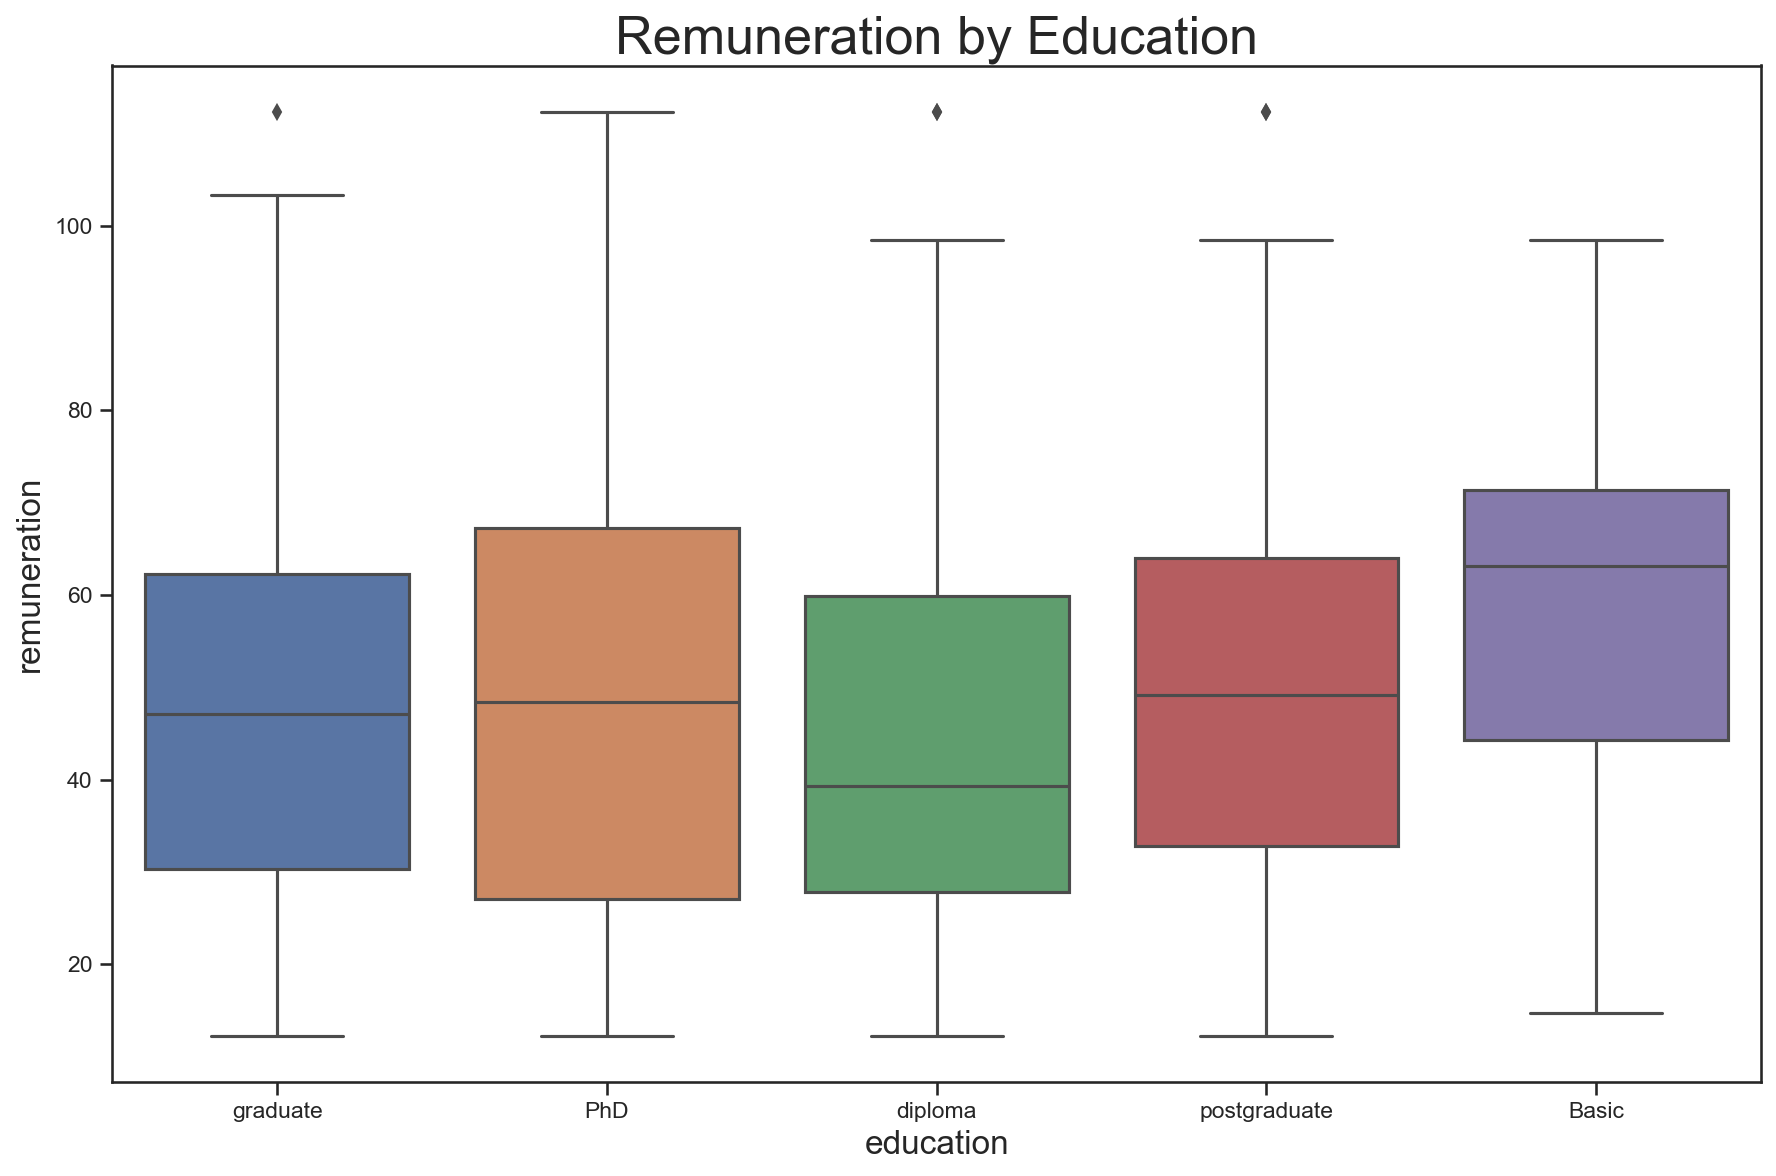

In [27]:
# Check if there is a relationship of remuneration with categorical variables.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.title('Remuneration by Education', fontsize=25)
plt.xlabel('education', fontsize=16),
plt.ylabel('remuneration', fontsize=16),
sns.boxplot(data=df, y='remuneration', x='education')
plt.savefig('Remuneration and Education')

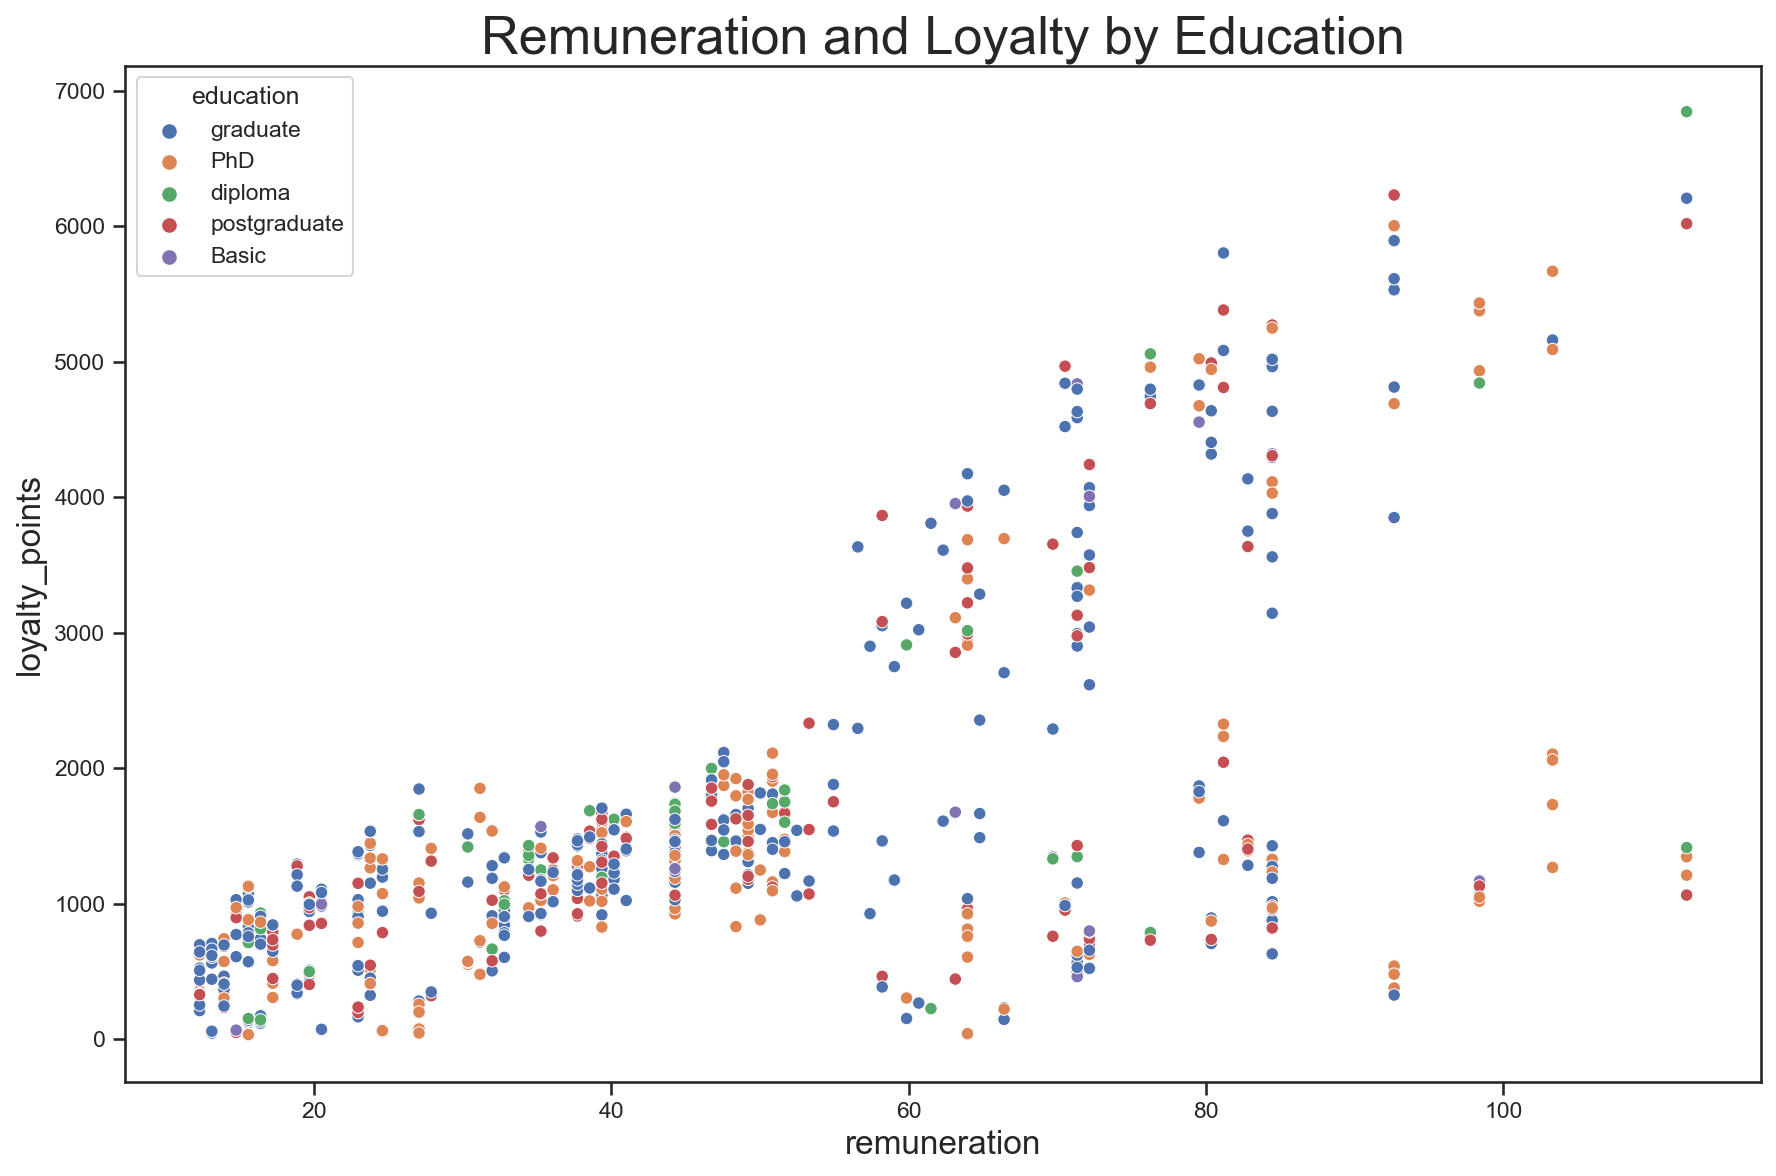

In [28]:
# Check if there is a relationship of remuneration with categorical variables.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.title('Remuneration and Loyalty by Education', fontsize=25)
plt.xlabel('remuneration', fontsize=16),
plt.ylabel('loyalty_points', fontsize=16),
sns.scatterplot(data=df, x='remuneration', y='loyalty_points', hue='education')
plt.savefig('Remuneration and Education')

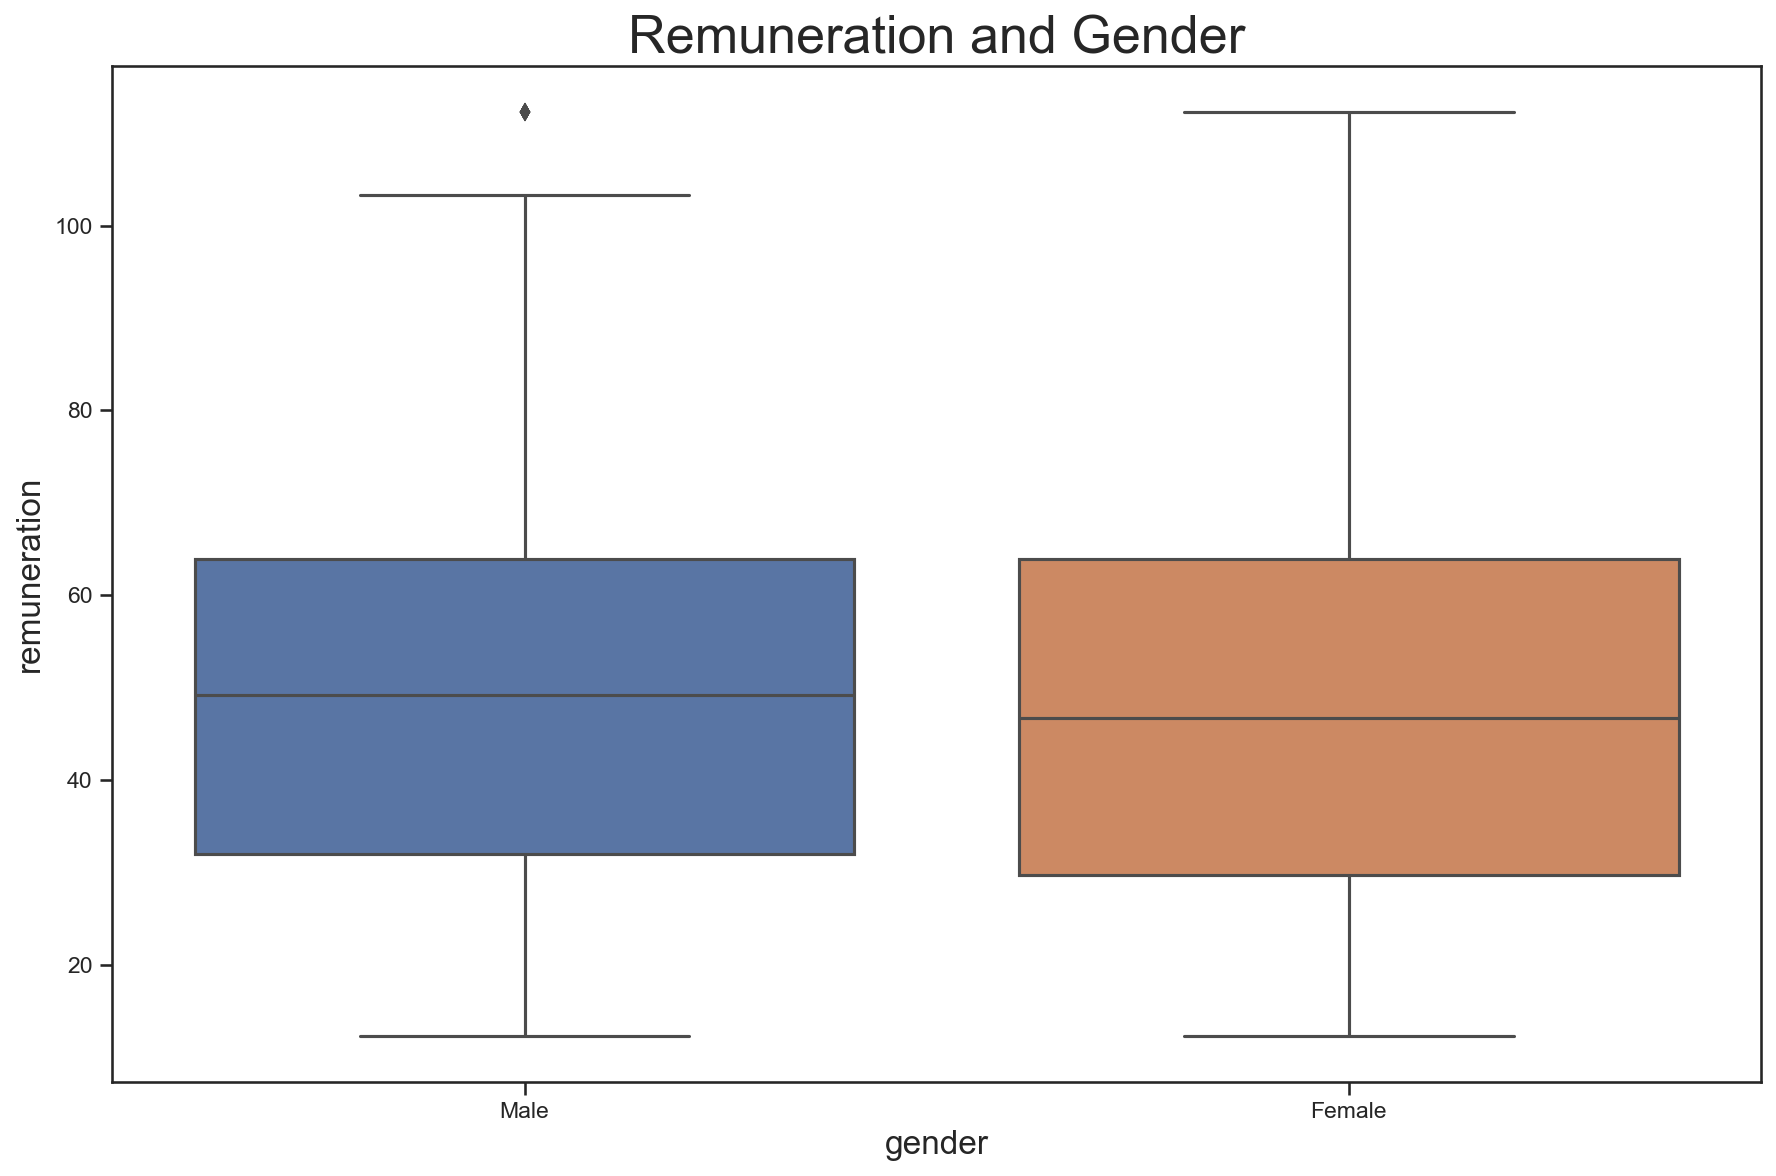

In [29]:
# Remuneration vs gender.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Remuneration and Gender', fontsize=25)
sns.set_theme(style='ticks')
plt.xlabel('remuneration', fontsize=16),
plt.ylabel('gender', fontsize=16),
sns.boxplot(data=df, y='remuneration', x='gender')
plt.savefig('Remuneration vs gender')

## Descriptive statistics and visualisations help to understand variables:
For the profile of the business - games and toys - identifying the age groups and their relevance can be important. Age distribution shows a significant concentration of customers between 32-39 while age range is 17-72 with a mean of 39.5. 

Renumeration 12k - 112k with outliers above the 80-90k area. Consider if the mean of 48k as individual income should describe middle class customers? The IQR in the boxplots outlines an age and salary profile of customers.

Spending score 1 – 99 and the mean is exactly 50. Based on the metadata this score might be
calculated in a similar way as loyalty points are accrued by customers with their behaviour and purchases.

Loyalty points 25 - 6847 the distribution is relevant as this is the target variable.

Product range 107 - 11086 but this is not really a numeric variable. Based on metadata this might be many different categories of products. Fairly equally distributed between 200 product labels so further analysis might be needed.

Education, the median loyalty points and remuneration for basic education are slightly higher.  There is also difference in the interquartile range. This is the smallest group in education category based on value count.

Gender, there seems to be no meaningful impact, though the median male remuneration is slightly higher. 1120/880 female/male ratio.

Stronger correlations: loyalty points with renumeration and spending score  

# 5. Linear regression. 

## Before starting regression analysis:
The dependent variable was checked for normal distribution. It is strongly skewed right so the variable should be transformed.
The assumption of linearity must be checked scatterplotting dependent variable against the independent variables. This also allows to detect heteroscedasticity.

### 5a) spending vs loyalty

<AxesSubplot:xlabel='loyalty_points', ylabel='Density'>

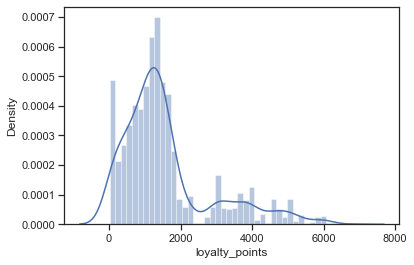

In [30]:
# Define the dependent variable.
y = df['loyalty_points']  

# Look at the distribution.
sns.distplot(y)

<AxesSubplot:xlabel='loyalty_points'>

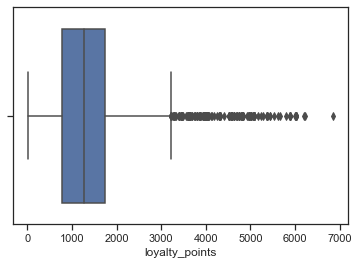

In [31]:
8
sns.boxplot(y)

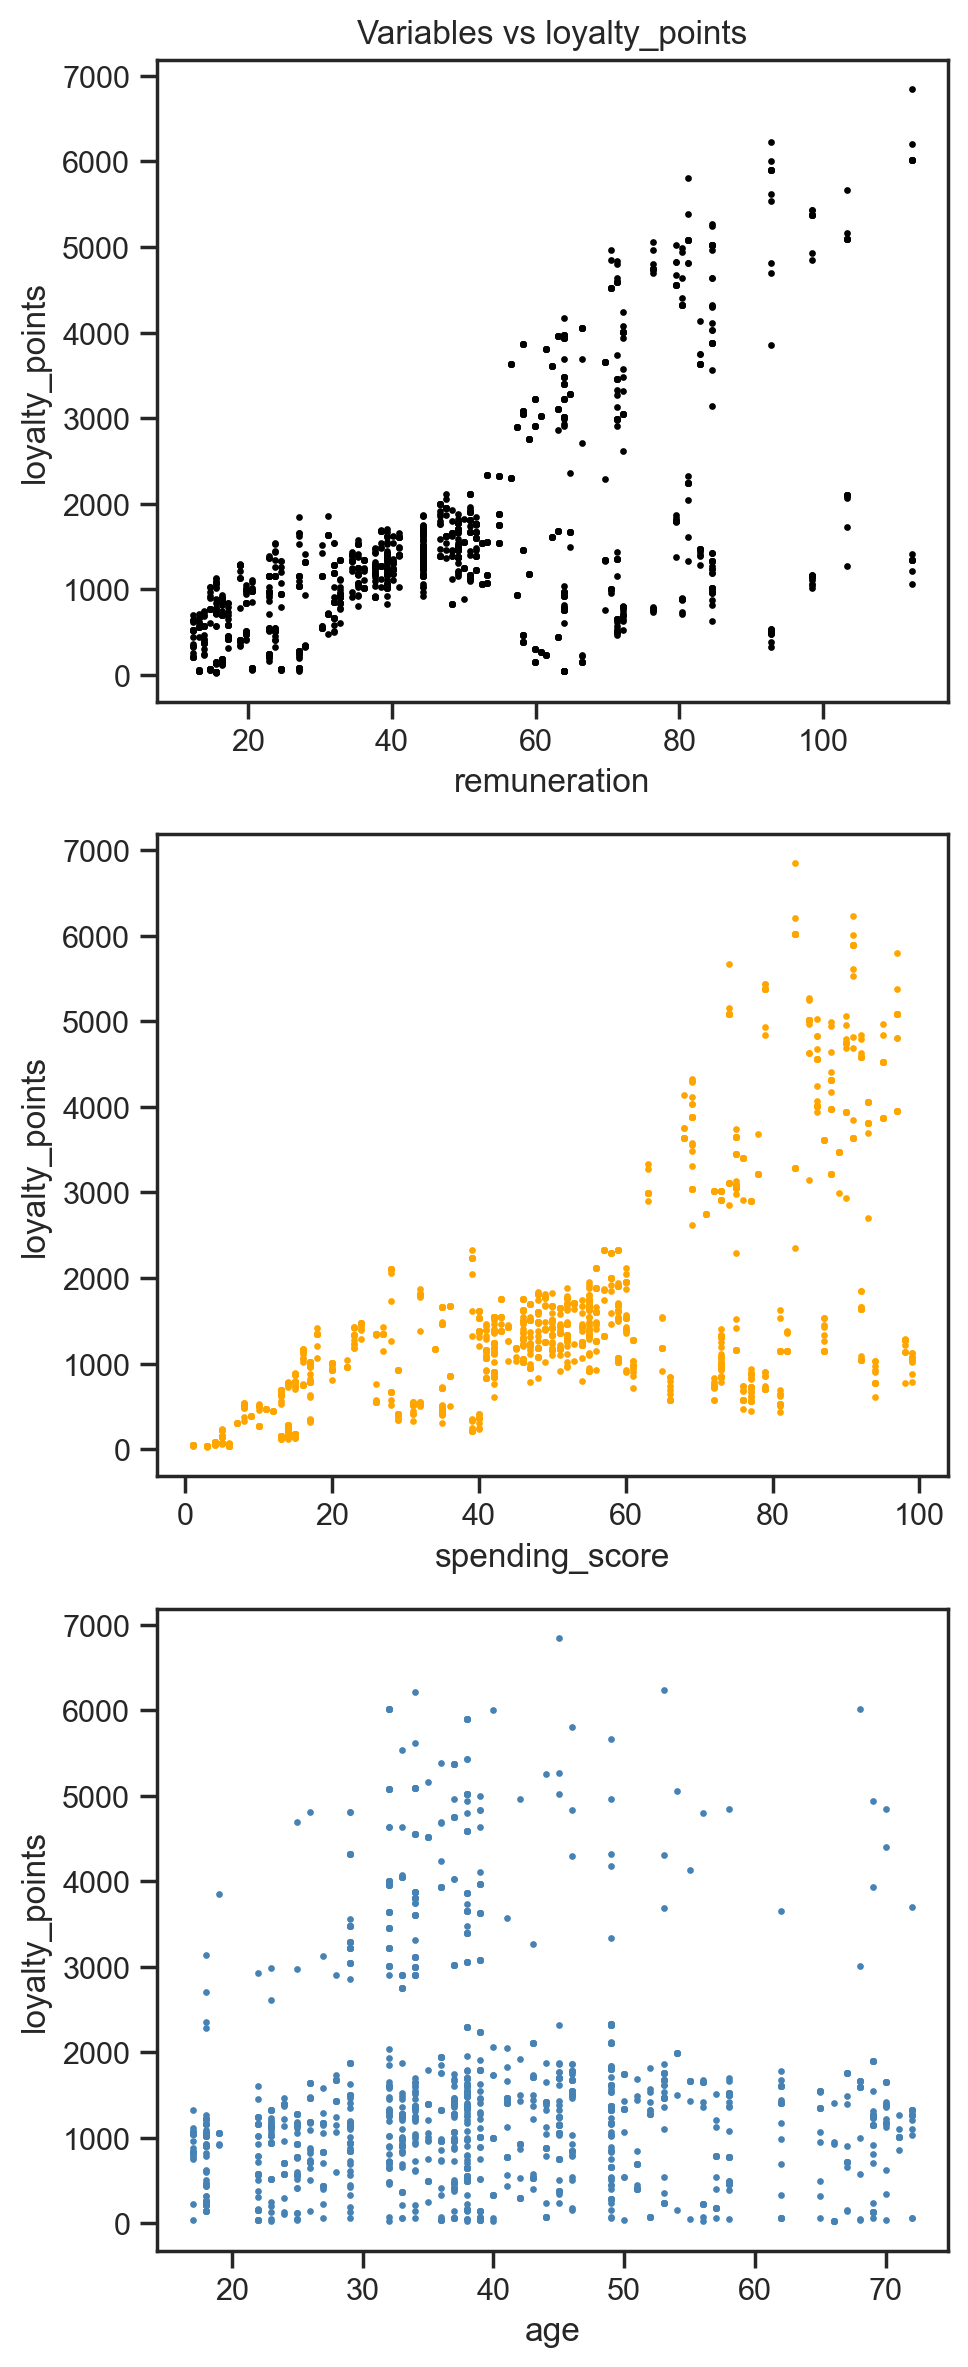

In [145]:
# Visualise the dataset to check for linearity.
plt.figure(figsize=(5, 12), dpi=200)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.subplot(3,1,1)
plt.title('Variables vs loyalty_points')
plt.ylabel('loyalty_points')
plt.xlabel('remuneration')
plt.scatter(data=df, y='loyalty_points', x='remuneration', color='black', s=2)
plt.subplot(3,1,2)
plt.xlabel("spending_score")
plt.ylabel('loyalty_points')
plt.scatter(data=df, y='loyalty_points', x='spending_score', color='orange', s=2)
plt.subplot(3,1,3)
plt.xlabel("age")
plt.ylabel('loyalty_points')
plt.scatter(data=df, y='loyalty_points', x='age', color='steelblue', s=2)

### 5d) age vs remuneration

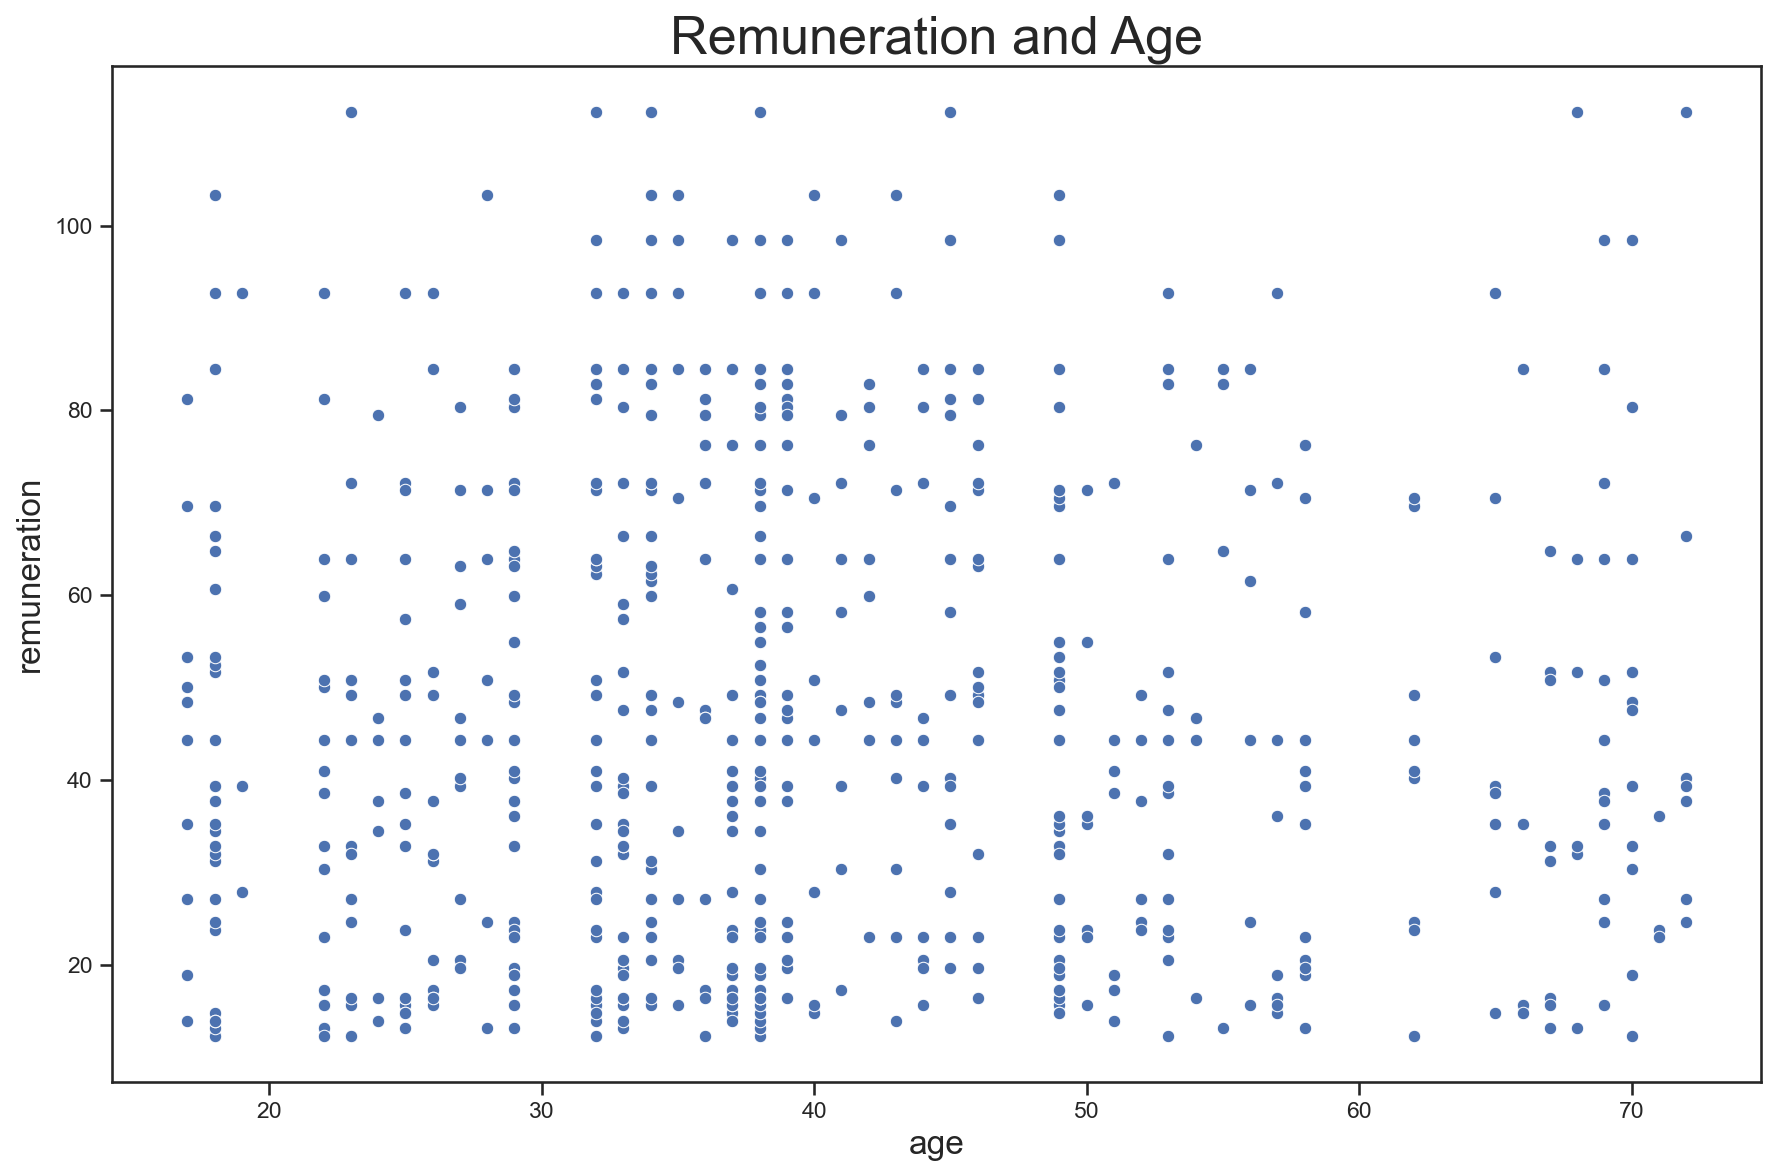

In [33]:
# Look at relationship between remuneration and age.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Remuneration and Age', fontsize=25)
sns.set_theme(style='ticks')
plt.xlabel('age', fontsize=16),
plt.ylabel('remuneration', fontsize=16),
sns.scatterplot(data=df, y='remuneration', x='age')
plt.savefig('Remuneration vs age')

## 6. Observations and insights

Thre are multiple problems to do a linear regression. First of all the dependent variable has no normal distribution, it is heavily skewed to right. Then there is the heteroscedasticity problem with the two meaningful independent variables. The transformation of the dependent variable can help. Otherwise scaling or removing outliers would be necessary to deal with these issues.

In [34]:
# Define the independent variables.
x = df['spending_score']
r = df['remuneration']
a = df['age']

In [35]:
# Choose a nonlinear transformation, calculate new columns.
df['log_loyalty'] = np.log(df['loyalty_points'])
df['sqrt_loyalty'] = np.sqrt(df['loyalty_points'])
df['rec_loyalty'] = 1/(df['loyalty_points'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   log_loyalty     2000 non-null   float64
 10  sqrt_loyalty    2000 non-null   float64
 11  rec_loyalty     2000 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [36]:
# Statistics of possible transformation. 
df.describe()

age  remuneration  spending_score  loyalty_points  \
count  2000.000000   2000.000000     2000.000000     2000.000000   
mean     39.495000     48.079060       50.000000     1578.032000   
std      13.573212     23.123984       26.094702     1283.239705   
min      17.000000     12.300000        1.000000       25.000000   
25%      29.000000     30.340000       32.000000      772.000000   
50%      38.000000     47.150000       50.000000     1276.000000   
75%      49.000000     63.960000       73.000000     1751.250000   
max      72.000000    112.340000       99.000000     6847.000000   

            product  log_loyalty  sqrt_loyalty  rec_loyalty  
count   2000.000000  2000.000000   2000.000000  2000.000000  
mean    4320.521500     6.982154     36.597584     0.002008  
std     3148.938839     1.020456     15.452126     0.004337  
min      107.000000     3.218876      5.000000     0.000146  
25%     1589.250000     6.648985     27.784888     0.000571  
50%     3624.000000     7.151484     35.721131     0.000784  
75%     6654.000000     7.468085     41.847939     0.001295  
max    11086.000000     8.831566     82.746601     0.040000

<AxesSubplot:xlabel='log_loyalty'>

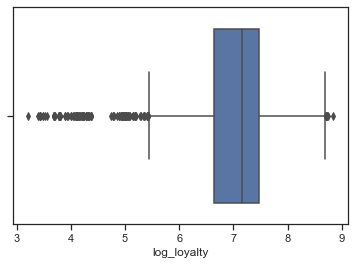

In [37]:
# Visualising possible transformation. 
sns.boxplot(x=df['log_loyalty'])

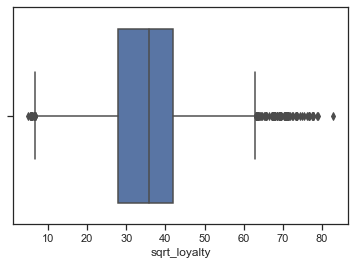

In [38]:
# Visualising possible transformation. 
sns.boxplot(x=df['sqrt_loyalty'])
plt.savefig('sqrt distribution')

<AxesSubplot:xlabel='rec_loyalty'>

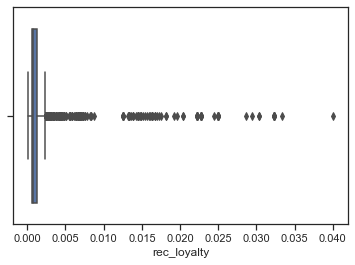

In [39]:
# Visualising possible transformation. 
sns.boxplot(x=df['rec_loyalty'])

<AxesSubplot:ylabel='Density'>

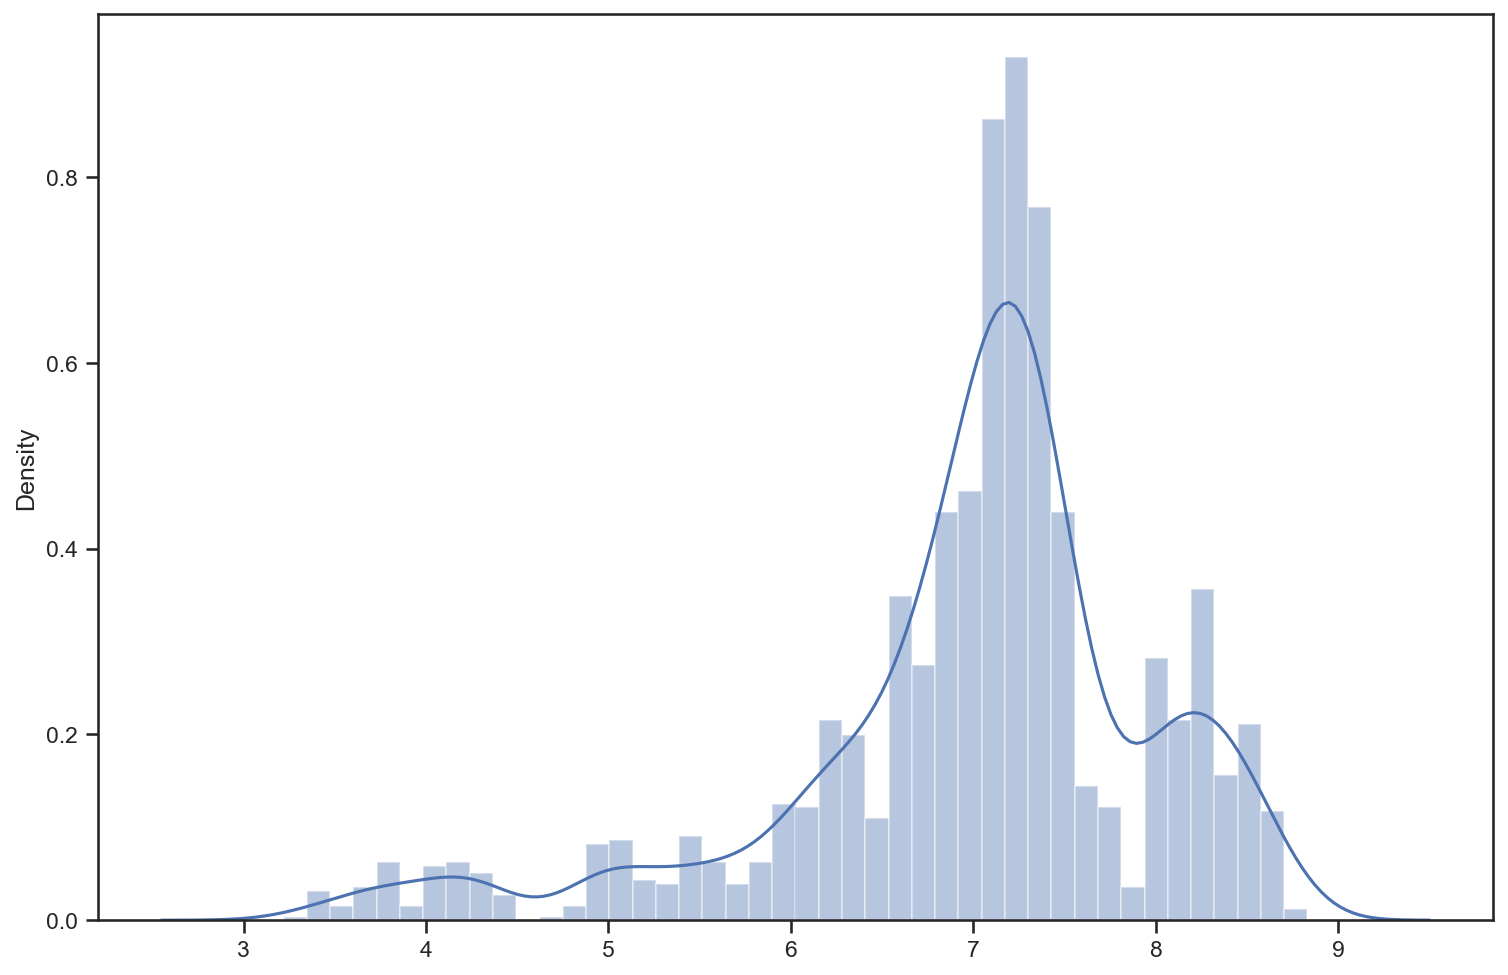

In [40]:
# Visualising possible transformation. 
plt.figure(figsize=(12, 8), dpi=150)
sns.distplot(x=df['log_loyalty'])

<AxesSubplot:ylabel='Density'>

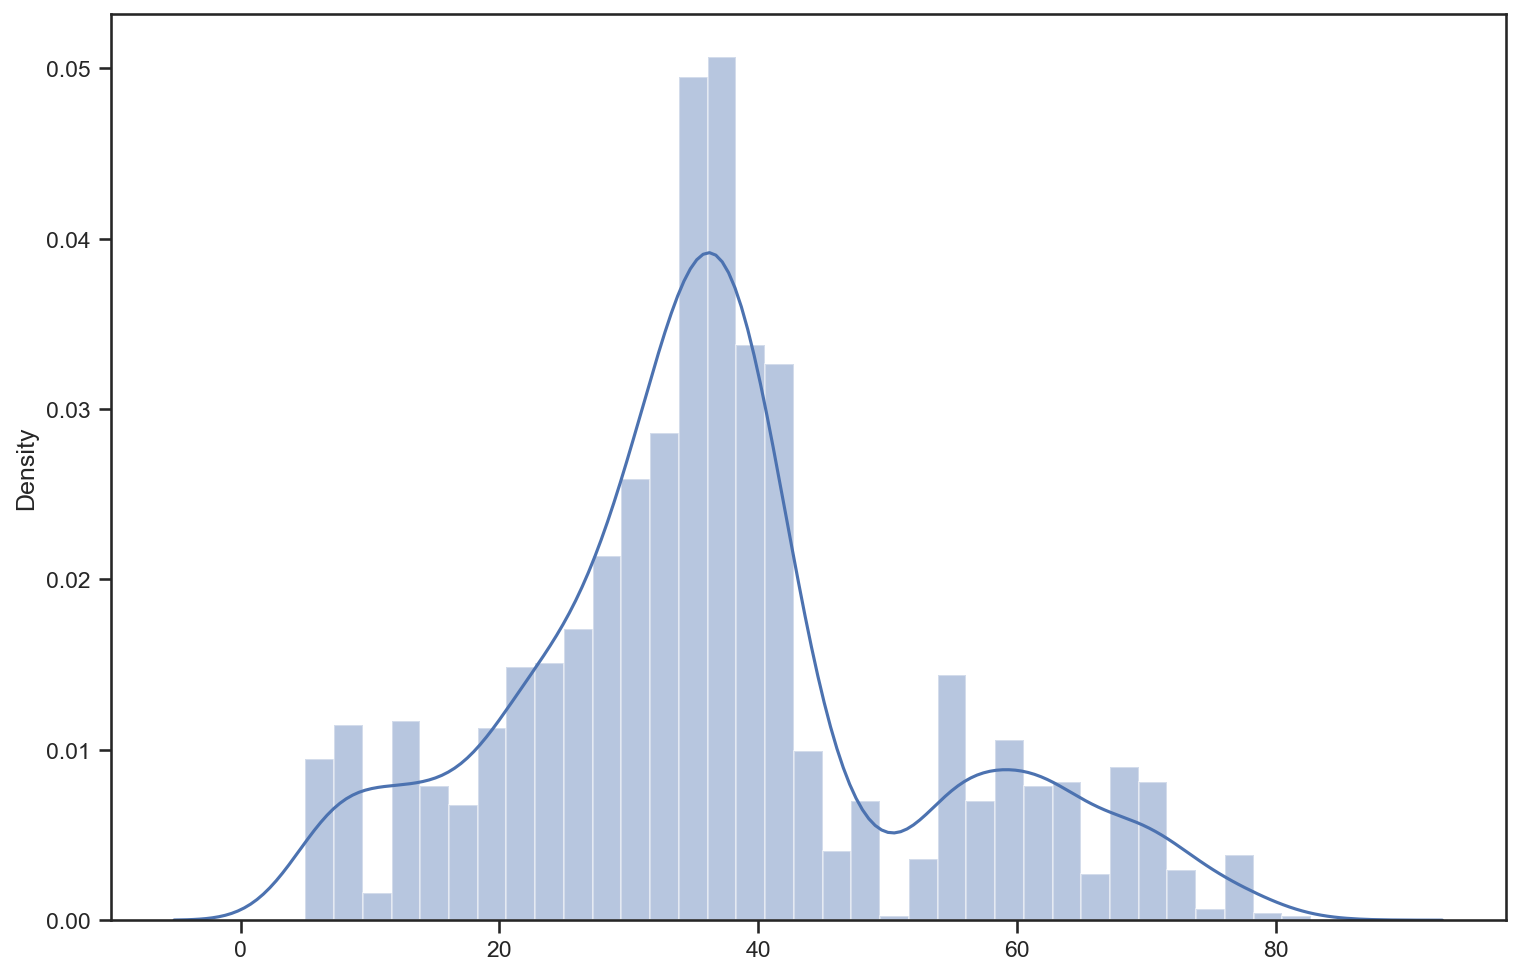

In [41]:
# Visualising possible transformation. 
plt.figure(figsize=(12, 8), dpi=150)
sns.distplot(x=df['sqrt_loyalty'])

<AxesSubplot:ylabel='Density'>

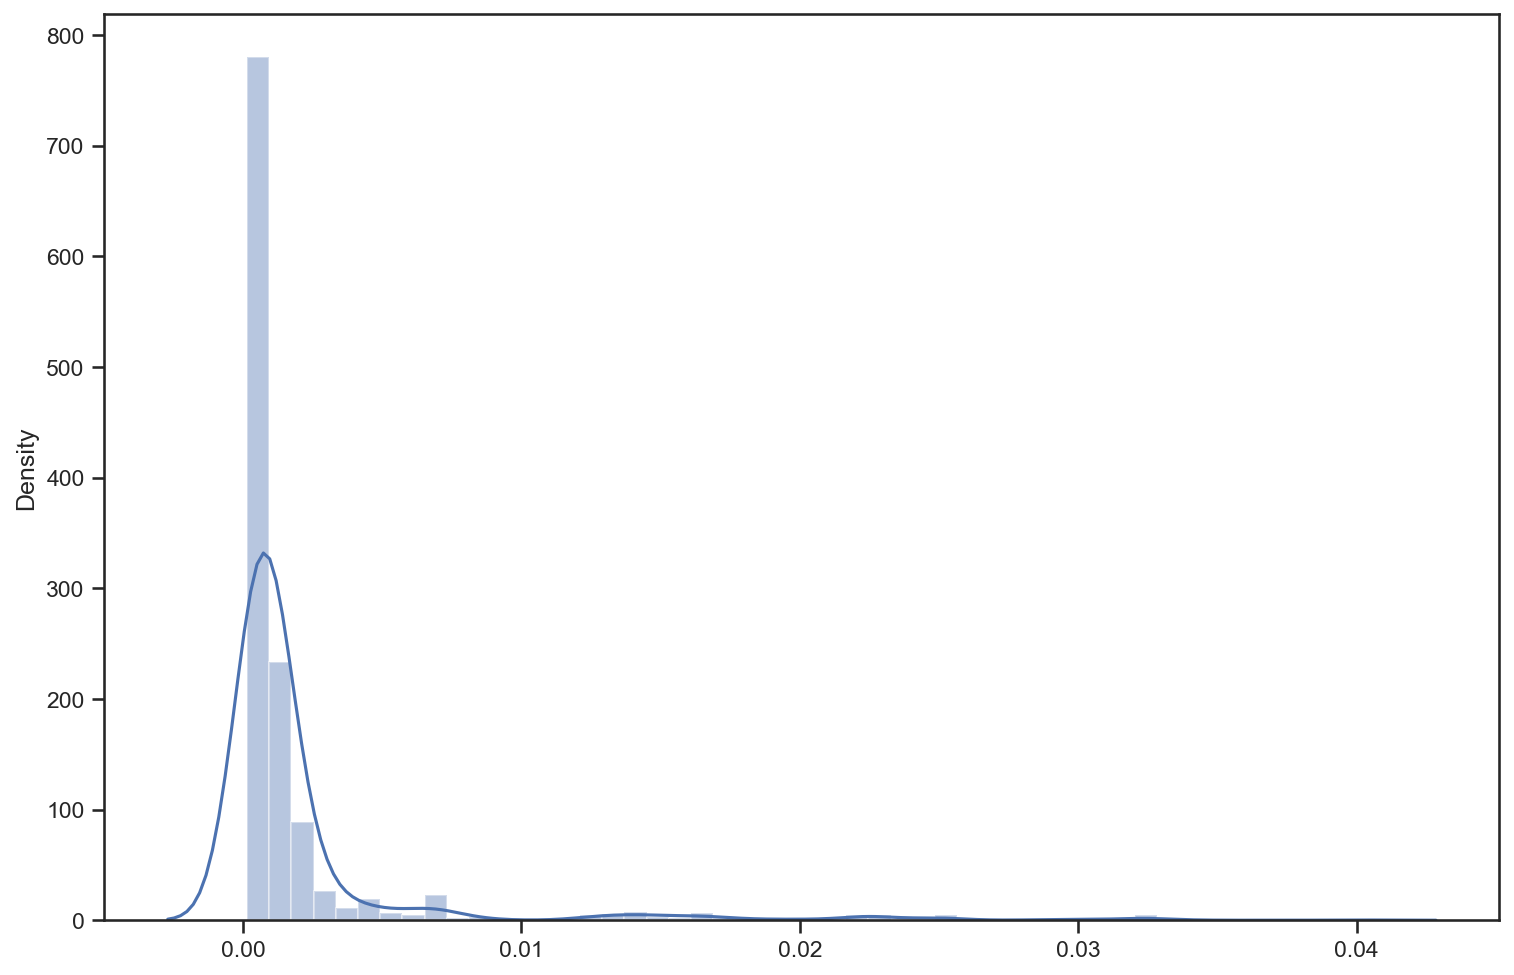

In [42]:
# Visualising possible transformation. 
plt.figure(figsize=(12, 8), dpi=150)
sns.distplot(x=df['rec_loyalty'])

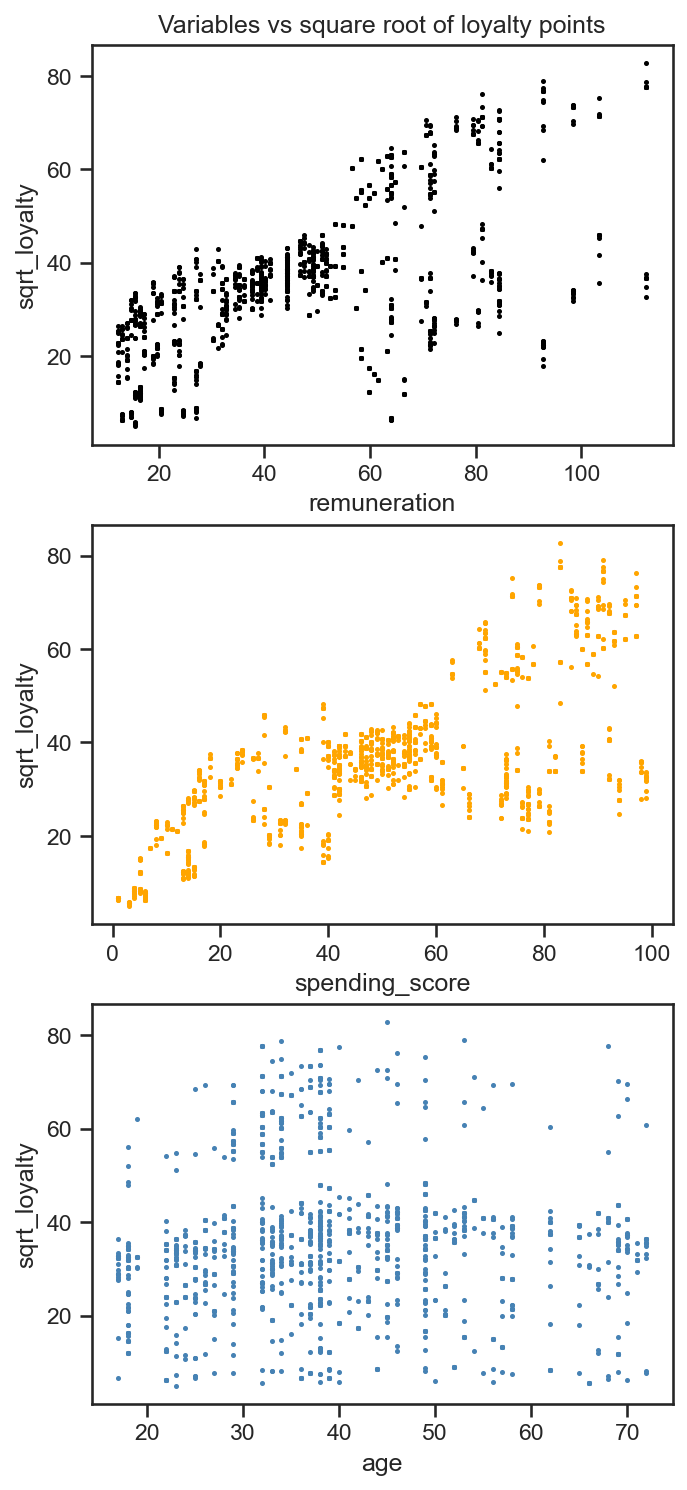

In [148]:
# Visualise the dataset
plt.figure(figsize=(5, 12), dpi=150)
plt.subplot(3,1,1)
plt.title('Variables vs square root of loyalty points')
plt.ylabel('sqrt_loyalty')
plt.xlabel('remuneration')
plt.scatter(data=df, y='sqrt_loyalty', x='remuneration', color='black', s=2)
plt.subplot(3,1,2)
plt.xlabel("spending_score")
plt.ylabel('sqrt_loyalty')
plt.scatter(data=df, y='sqrt_loyalty', x='spending_score', color='orange',s=2)
plt.subplot(3,1,3)
plt.xlabel("age")
plt.ylabel('sqrt_loyalty')
plt.scatter(data=df, y='sqrt_loyalty', x='age', color='steelblue', s=2)
plt.savefig('sqrt vs variables')
plt.show()

In [44]:
# Prepare your workstation
# Import necessary libraries.

import numpy as np
import pandas as pd
import pylab as py
import sklearn
import math

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats

import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [45]:
# Fit a Multiple Linear regression 

# Define the dependent variable.
y = df['sqrt_loyalty'] 

# Define the independent variables.
X = df[['remuneration','spending_score']]

In [46]:
# Fit the model.
mlr = linear_model.LinearRegression()
mlr.fit(X,y)   # Fit the regression model

LinearRegression()

In [47]:
print("R-square:  ", mlr.score(X, y))     # Print the R-squared value
print("Intercept:  ", mlr.intercept_)     # Print intercept
print("Coefficients:  ")                  # Print list of coefficients
list(zip(X, mlr.coef_))

R-square:   0.8886999296049551
Intercept:   -4.1366731347728205
Coefficients:  


[('remuneration', 0.4035288025859628), ('spending_score', 0.42665943890888575)]

In [48]:
# Pass linear regression through OLS methods.
df2 = ols('y ~ remuneration+spending_score', data = df).fit()

# Print the regression table.
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     7973.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:48:46   Log-Likelihood:                -6117.3
No. Observations:                2000   AIC:                         1.224e+04
Df Residuals:                    1997   BIC:                         1.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1367      0.345    -11.987      0.000      -4.813      -3.460
remuneration       0.4035      0.005     80.888      0.000       0.394       0.413
spending_score     0.4267      0.004     96.512      0.000       0.418       0.435
==============================================================================
Omnibus:                      322.290   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.645
Skew:                          -1.173   Prob(JB):                    1.74e-107
Kurtosis:                       3.628   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Split the data in train (80%) and test (20%).
Z_train, Z_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, 
                                                                            test_size = 0.20, 
                                                                            random_state = 5)

In [50]:
# Training the model using the 'statsmodel' OLS library
model = sm.OLS(Y_train, sm.add_constant(Z_train)).fit()     # Fit the model with added constant
Y_pred = model.predict(sm.add_constant(Z_test))             # Set the predicted response vector
print( model.summary())

                            OLS Regression Results                            
Dep. Variable:           sqrt_loyalty   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     5944.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:48:46   Log-Likelihood:                -4895.5
No. Observations:                1600   AIC:                             9797.
Df Residuals:                    1597   BIC:                             9813.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.0766      0.397    -10.

In [51]:
mlr = LinearRegression()
mlr.fit(Z_train, Y_train)            # Fit the model
y_pred_mlr = mlr.predict(Z_test)     # Call he predictions of X in the test set
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [35.33186246 59.80500925 38.15238246 37.0131902  30.9573104  31.77600577
 59.29281629 30.9573104  58.04829685 45.98844828 14.3816196  22.08737951
 18.78912441 32.20182983 33.05347796 34.94847029 18.69327637 36.58736614
 56.56814433 45.98844828 37.86483833 44.34955242 36.16304719  8.91030718
 71.96070587 54.34317598 59.98572108 36.88589452  8.1545071  36.62979804
 34.92650179 69.16064927 32.81784486 65.73359337 32.4783897  41.87796673
 15.86177212 24.78060382 45.24363244 26.44146818 38.66307031 29.1361976
 29.97686147 36.58736614  6.30194666 35.8849822  32.5427901  37.81142218
  3.75798653 37.15147014 36.90786302  3.47044241 54.87583233 36.66124568
 17.48020458 37.16245439 34.64994191 31.34867659 34.25556549 66.10600129
 64.55196923 36.26837437 40.08032755 32.81934998 35.51257429 32.75494958
 41.55746984 31.02968482 24.03578799 36.61730867 40.08032755 18.74669252
 66.10600129 60.27326521 39.42985464 36.12858932 18.56598069 61.58218504
 41.50555881 31.77600577 40

In [52]:
print(mlr.score(Z_test, Y_test)*100)

91.03819998687904


Text(0.5, 0, 'spending_score')

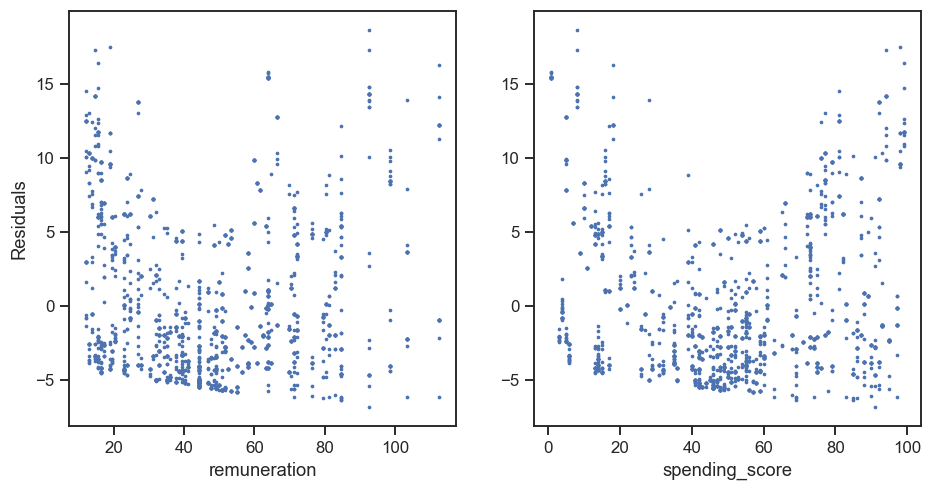

In [53]:
# Visually check residuals.
residuals = df2.predict() - y  
plt.figure(figsize=(10, 5), dpi=110)
# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,2,1)
plt.scatter(df['remuneration'], residuals, s=2)
plt.xlabel('remuneration')
plt.ylabel('Residuals')
plt.subplot(1,2,2)
plt.scatter(df['spending_score'], residuals, s=2)
plt.xlabel('spending_score')


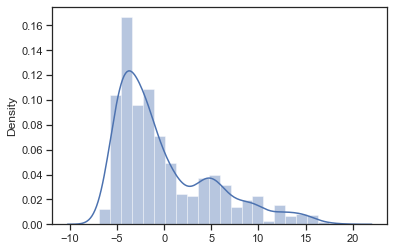

<Figure size 1800x1200 with 0 Axes>

In [54]:
# Histogram of residuals.
sns.distplot(x = residuals)
plt.figure(figsize=(12, 8), dpi=150)
plt.show()

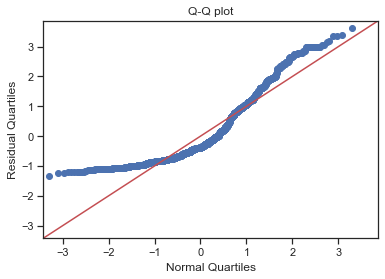

In [55]:
# QQ plot
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

In [56]:
# Check multicollinearity.
x_temp = sm.add_constant(Z_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0         9.5           const
1         1.0    remuneration
2         1.0  spending_score


In [57]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [58]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 0.0008354871267712838, 'LM Test p-value': 0.999582343679308, 'F-stat': 0.00041696051194981557, 'F-test p-value': 0.9995831265127513}


In [59]:
# Check the quality of the model.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error (Final): 4.129581641163773
Mean Square Error (Final): 26.353887057927697


## Predictive analysis successful:
If the p-value that corresponds to t is less than some threshold (e.g. α = .05) then we reject the null hypothesis and conclude that there is a statistically significant relationship between the predictor variable and the response variable.
coefficients show 1 change in predictor will increase loyalty points
R2 is 88 percent? so this much can be explained of the value of loyalty points

Residuals do not show a pattern.

VIF factor of 1 shows there is no collinearity at all (0) for the independent variables.

Breusch-Pagan test LM Test p = 0.999 SO we fail to reject homoscedasticity (H0) AND
WE ASSUME THAT HOMOSCEDASTICITY IS PRESENT

Metrics do not show severe errors in the model.

#possible to check sqrt vs remuneration single
#possible to check scaling of all variables
#possible to try and test different values, predict a value for business in report
#possible to deal with outliers




# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [60]:
# Import necessary libraries.
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the CSV file(s) as df2.
# Import new CSV file with Pandas.
df2 =  pd.read_csv('reviews_clean.csv')

# View DataFrame.
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

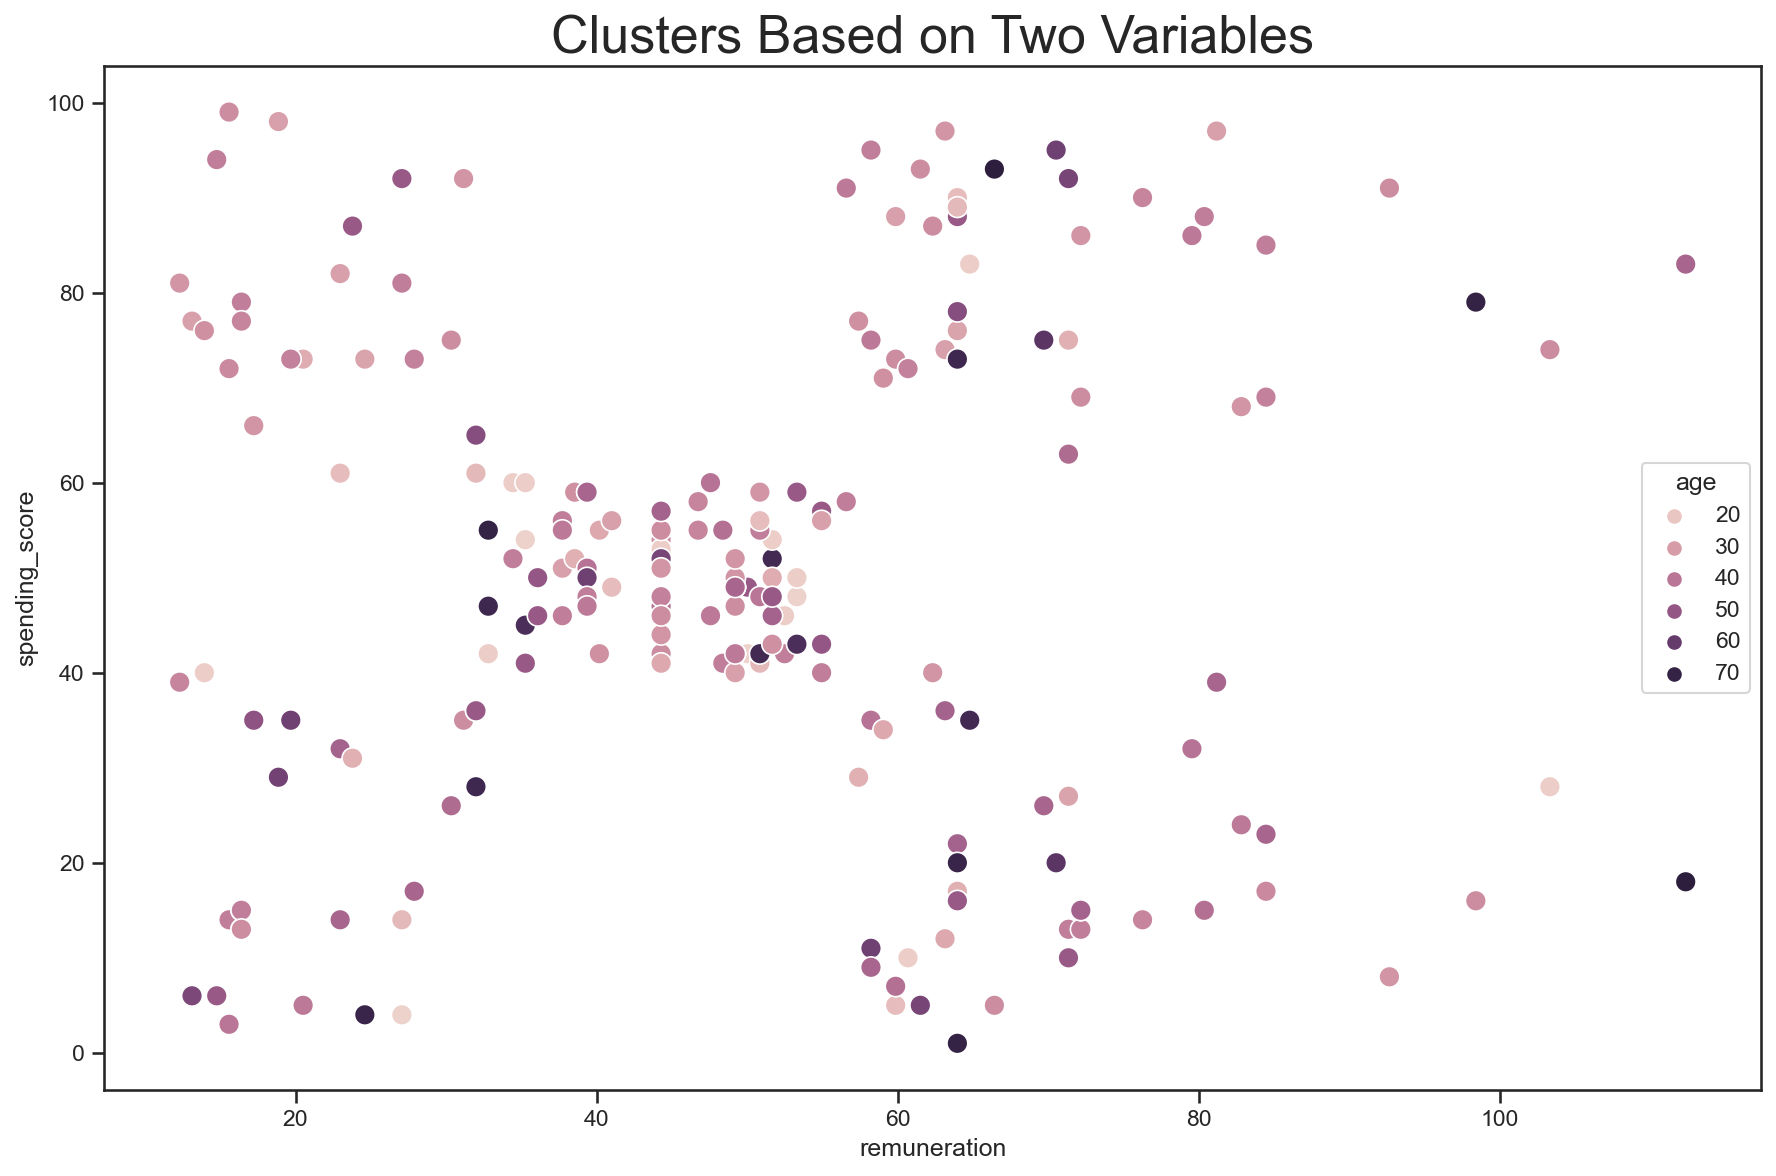

In [62]:
# Explore Age
# Create a scatterplot with Seaborn.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Clusters Based on Two Variables', size=25)
sns.set_theme(style='ticks')
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                data = df2,
                hue='age', s=100)
plt.savefig('Clusters_Age')

In [63]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score','loyalty_points']]

# View DataFrame.
df2

remuneration  spending_score  loyalty_points
0            12.30              39             210
1            12.30              81             524
2            13.12               6              40
3            13.12              77             562
4            13.94              40             366
...            ...             ...             ...
1995         84.46              69            4031
1996         92.66               8             539
1997         92.66              91            5614
1998         98.40              16            1048
1999         92.66               8             479

[2000 rows x 3 columns]

In [64]:
# Explore the data.
df2.info

<bound method DataFrame.info of       remuneration  spending_score  loyalty_points
0            12.30              39             210
1            12.30              81             524
2            13.12               6              40
3            13.12              77             562
4            13.94              40             366
...            ...             ...             ...
1995         84.46              69            4031
1996         92.66               8             539
1997         92.66              91            5614
1998         98.40              16            1048
1999         92.66               8             479

[2000 rows x 3 columns]>

In [65]:
# Descriptive statistics.
print(df2.columns)
df2.describe()

Index(['remuneration', 'spending_score', 'loyalty_points'], dtype='object')


remuneration  spending_score  loyalty_points
count   2000.000000     2000.000000     2000.000000
mean      48.079060       50.000000     1578.032000
std       23.123984       26.094702     1283.239705
min       12.300000        1.000000       25.000000
25%       30.340000       32.000000      772.000000
50%       47.150000       50.000000     1276.000000
75%       63.960000       73.000000     1751.250000
max      112.340000       99.000000     6847.000000

## 2. Plot

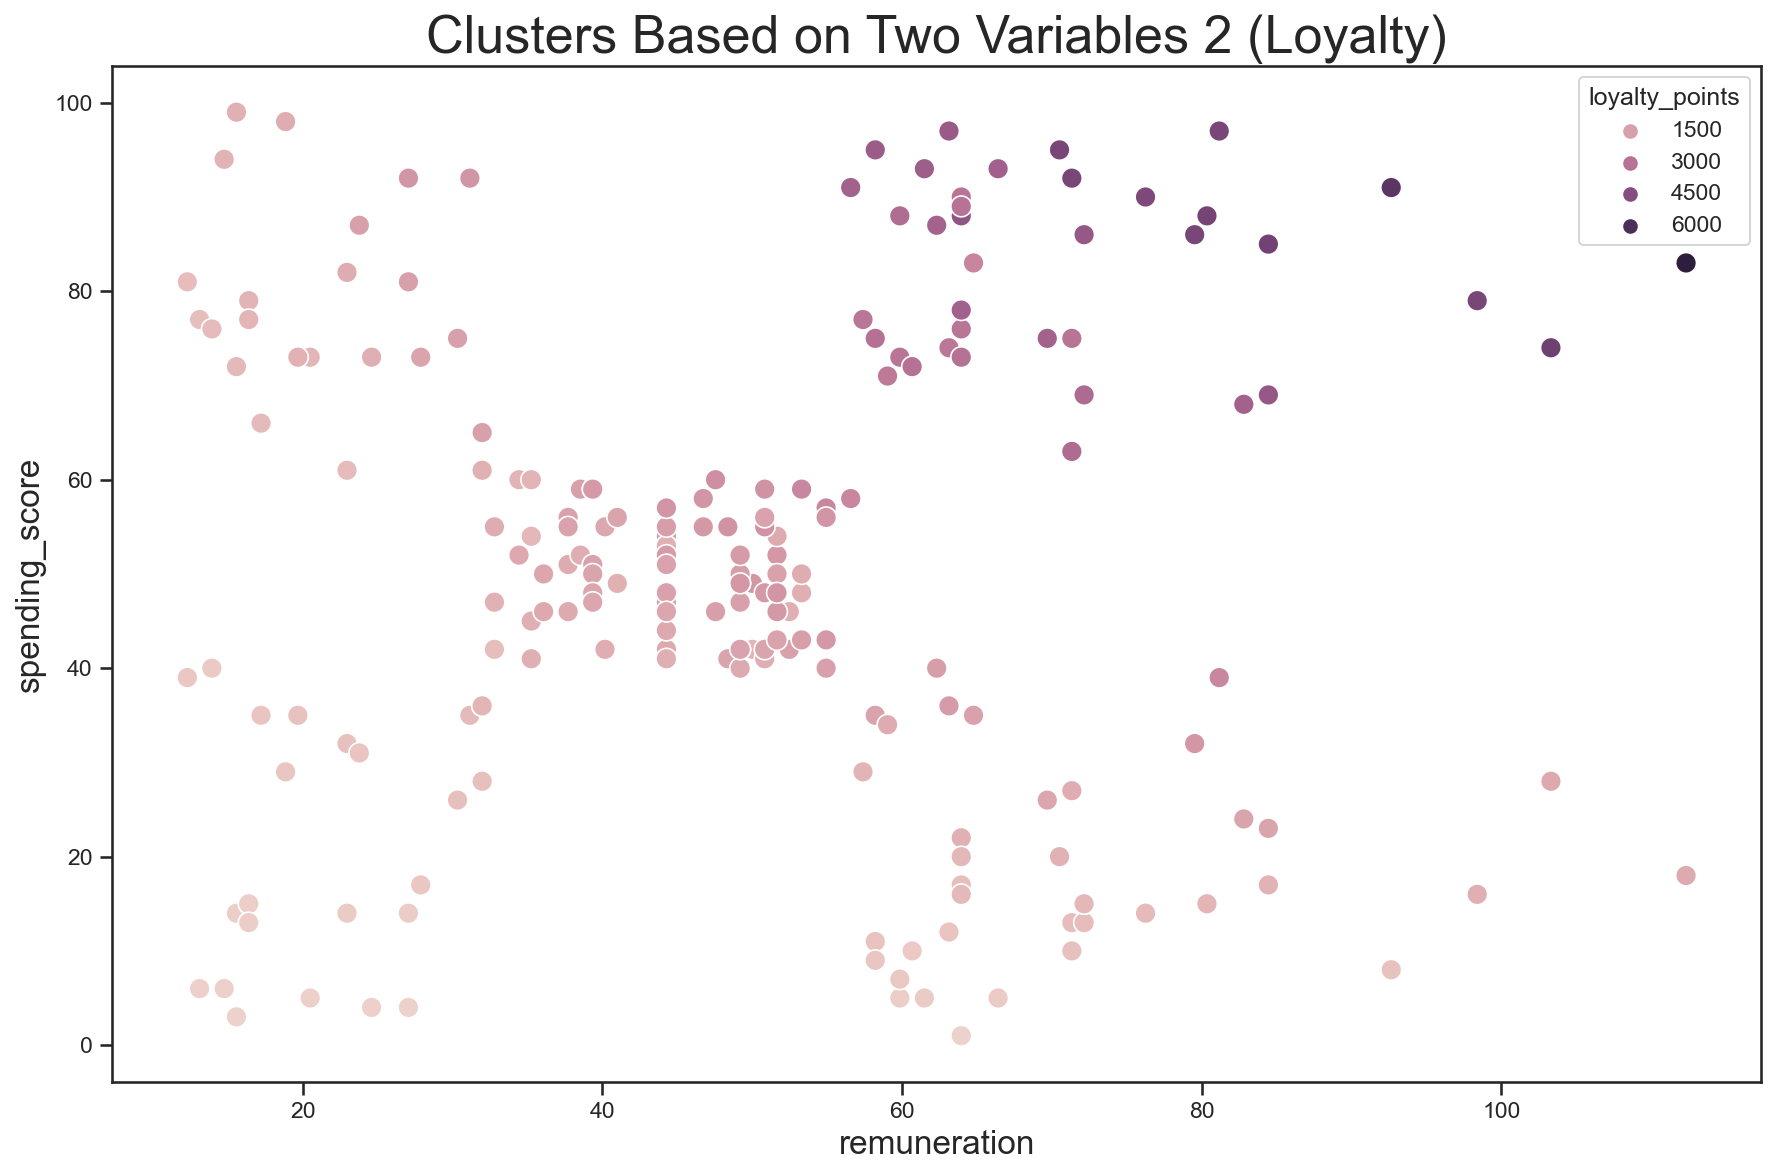

In [66]:
# Create a scatterplot with Seaborn to determine correlations and possible groups.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Clusters Based on Two Variables 2 (Loyalty)', size=25)
sns.set_theme(style='ticks')
plt.xlabel('remuneration', fontsize=16),
plt.ylabel('spending_score', fontsize=16),
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                data = df2,
                hue='loyalty_points', s=100)
plt.savefig('Clusters loyalty')

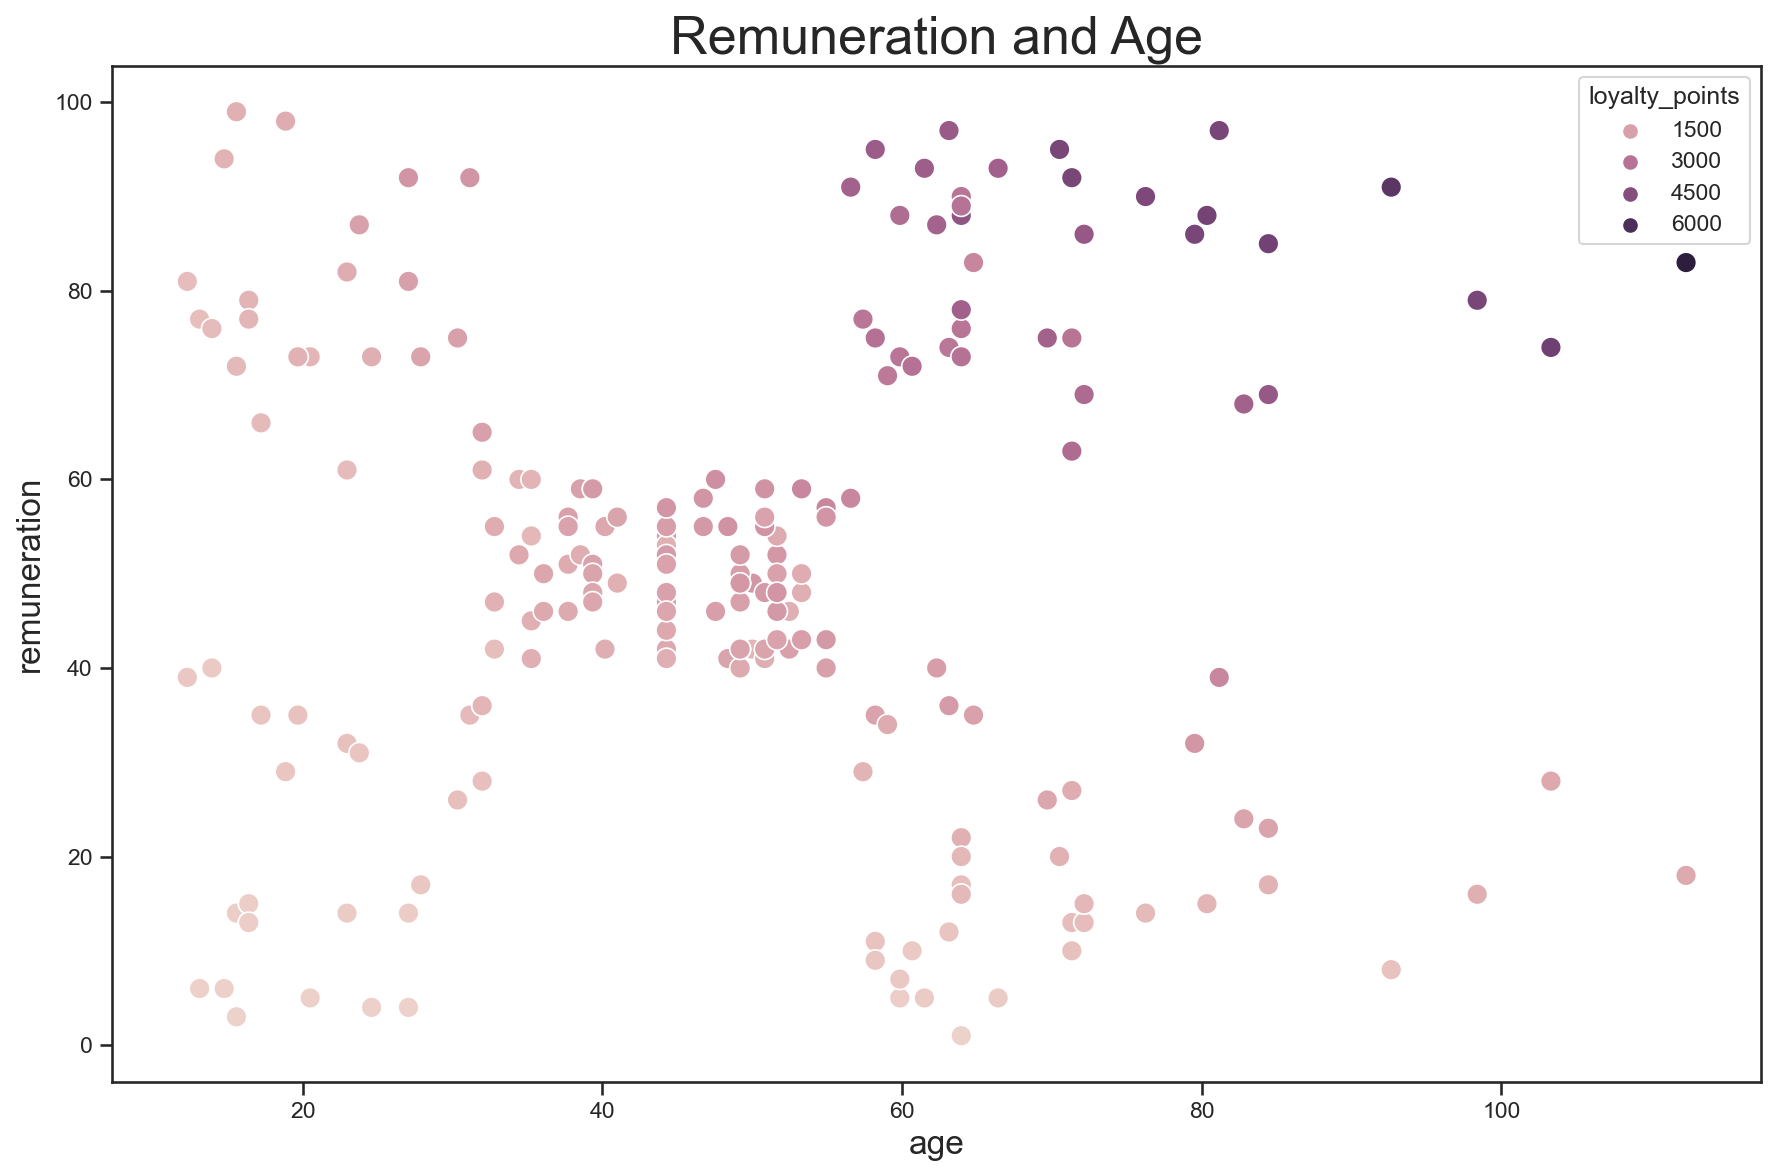

In [67]:
# Create a scatterplot with Seaborn.
# Look at relationship between remuneration and age.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Remuneration and Age', fontsize=25)
sns.set_theme(style='ticks')
plt.xlabel('age', fontsize=16),
plt.ylabel('remuneration', fontsize=16),
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                data = df2,
                hue='loyalty_points', s=100)
plt.savefig('Clusters remuneration and age')

<Figure size 432x288 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

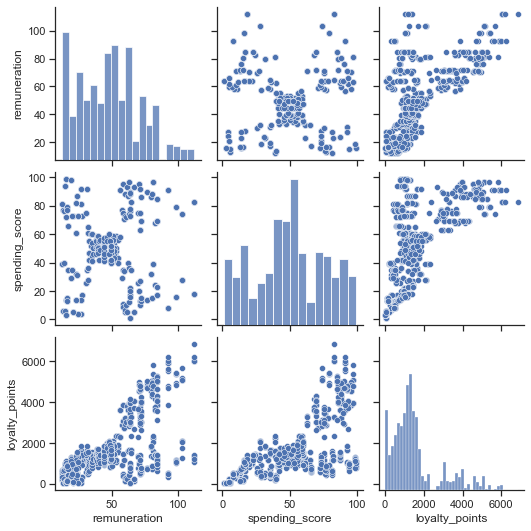

In [68]:
# Create a pairplot.
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.figure(figsize=(20, 20), dpi=150)
sns.pairplot(df2)

<Figure size 432x288 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

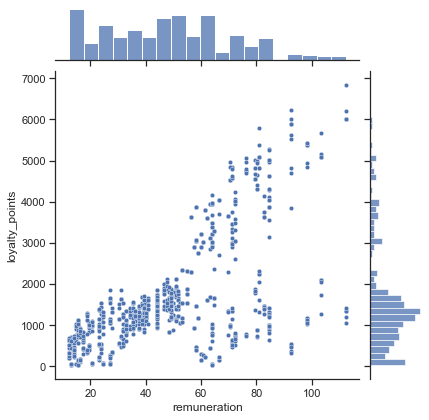

In [69]:
# Create separate plots to improve visualisations with Seaborn.
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.figure(figsize=(20, 20), dpi=150)
sns.jointplot(x='remuneration',y='loyalty_points', data=df2, s=20)

<Figure size 432x288 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

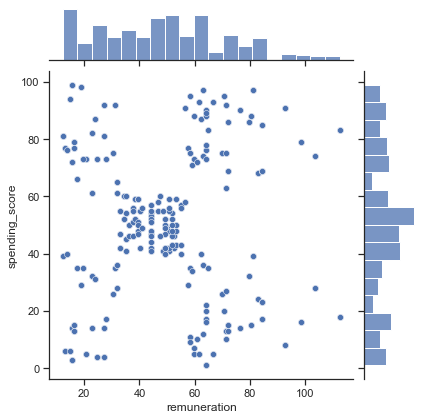

In [70]:
# Look at the relationship between the other variables.
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.figure(figsize=(20, 20), dpi=150)
sns.jointplot(x='remuneration',y='spending_score', data=df2)

## 3. Elbow and silhoutte methods

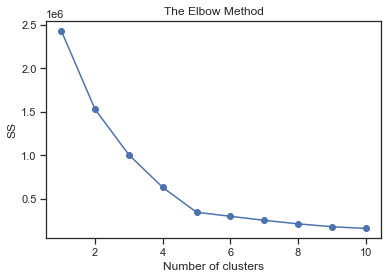

In [71]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 
x=df2[['remuneration','spending_score']]
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

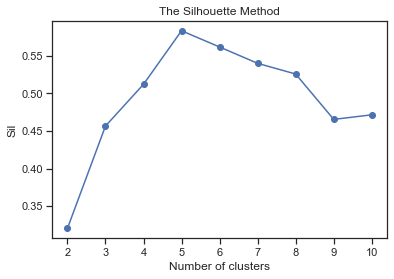

In [72]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## Comment
Both confirm the visual observation that 5 clusters would be appropriate. Trying with different values did not improve results.

## 4. Evaluate k-means model at different values of *k*

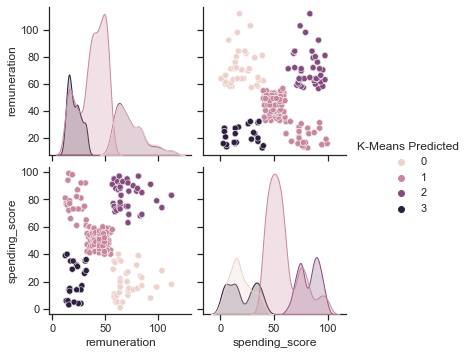

In [73]:
# Try to play around with other numbers of K
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

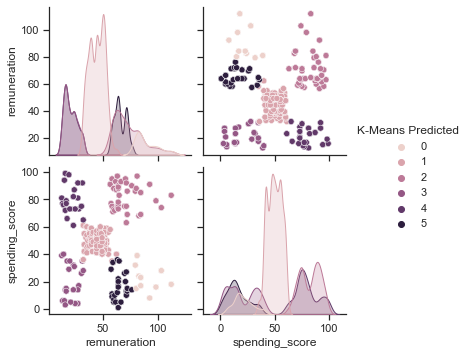

In [74]:
# Try to play around with other numbers of K
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

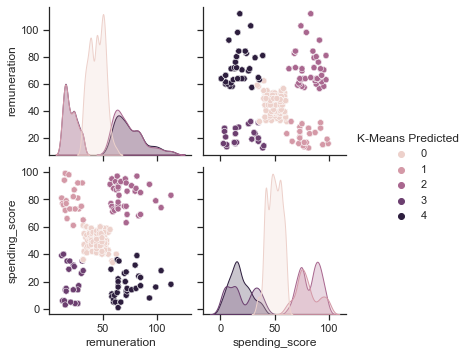

In [75]:
# Apply the final model, use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [76]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

<AxesSubplot:xlabel='K-Means Predicted', ylabel='count'>

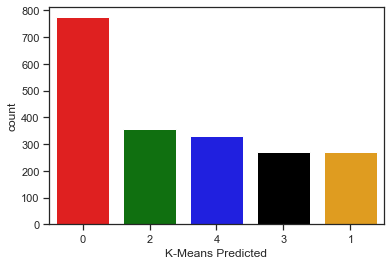

In [77]:
# Plot the value counts.
sns.countplot(data=x, x='K-Means Predicted', palette=['red', 'green', 'blue', 'black', 'orange'],
              order=x['K-Means Predicted'].value_counts().index)

## 6. Plot and interpret the clusters

In [78]:
# View the K-Means predicted.
print(x.head())
x

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  1
2            13.12               6                  3
3            13.12              77                  1
4            13.94              40                  3
...            ...             ...                ...
1995         84.46              69                  2
1996         92.66               8                  4
1997         92.66              91                  2
1998         98.40              16                  4
1999         92.66               8                  4

[2000 rows x 3 columns]

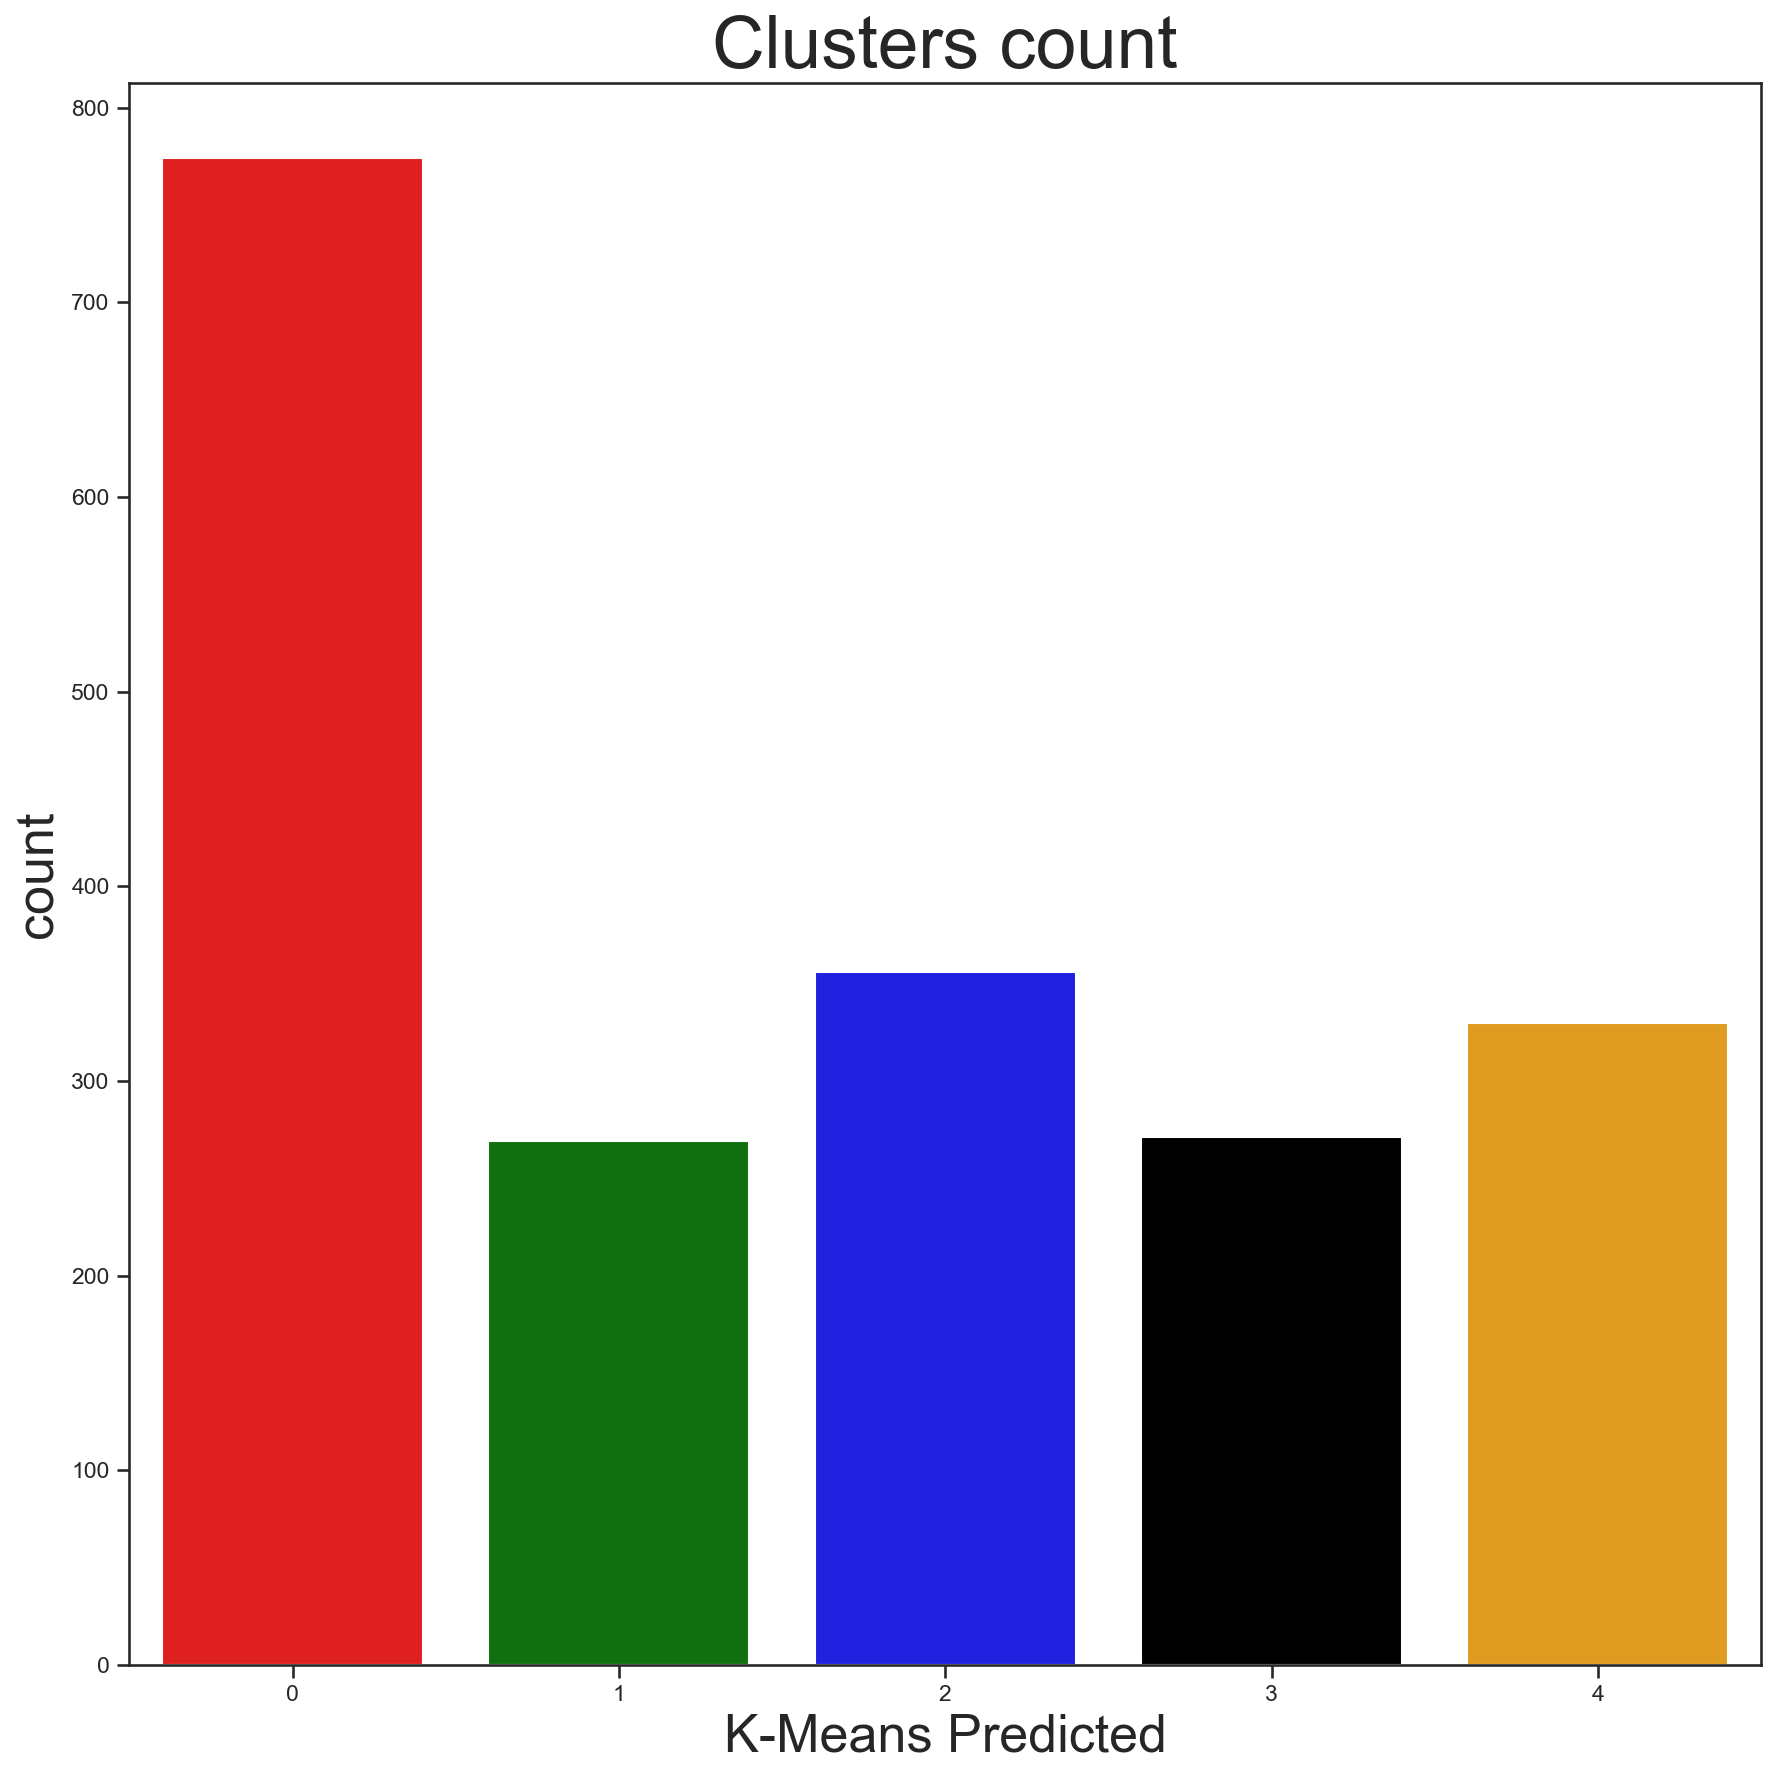

In [79]:
# Plot the value counts by cluster.
plt.figure(figsize=(12, 12), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.xlabel('', fontsize=25),
plt.ylabel('', fontsize=25),
plt.title('Clusters count', fontsize=35)
sns.countplot(data=x, x='K-Means Predicted', 
              palette=['red', 'green', 'blue', 'black', 'orange'])
plt.savefig('Clusters predicted bar 1')

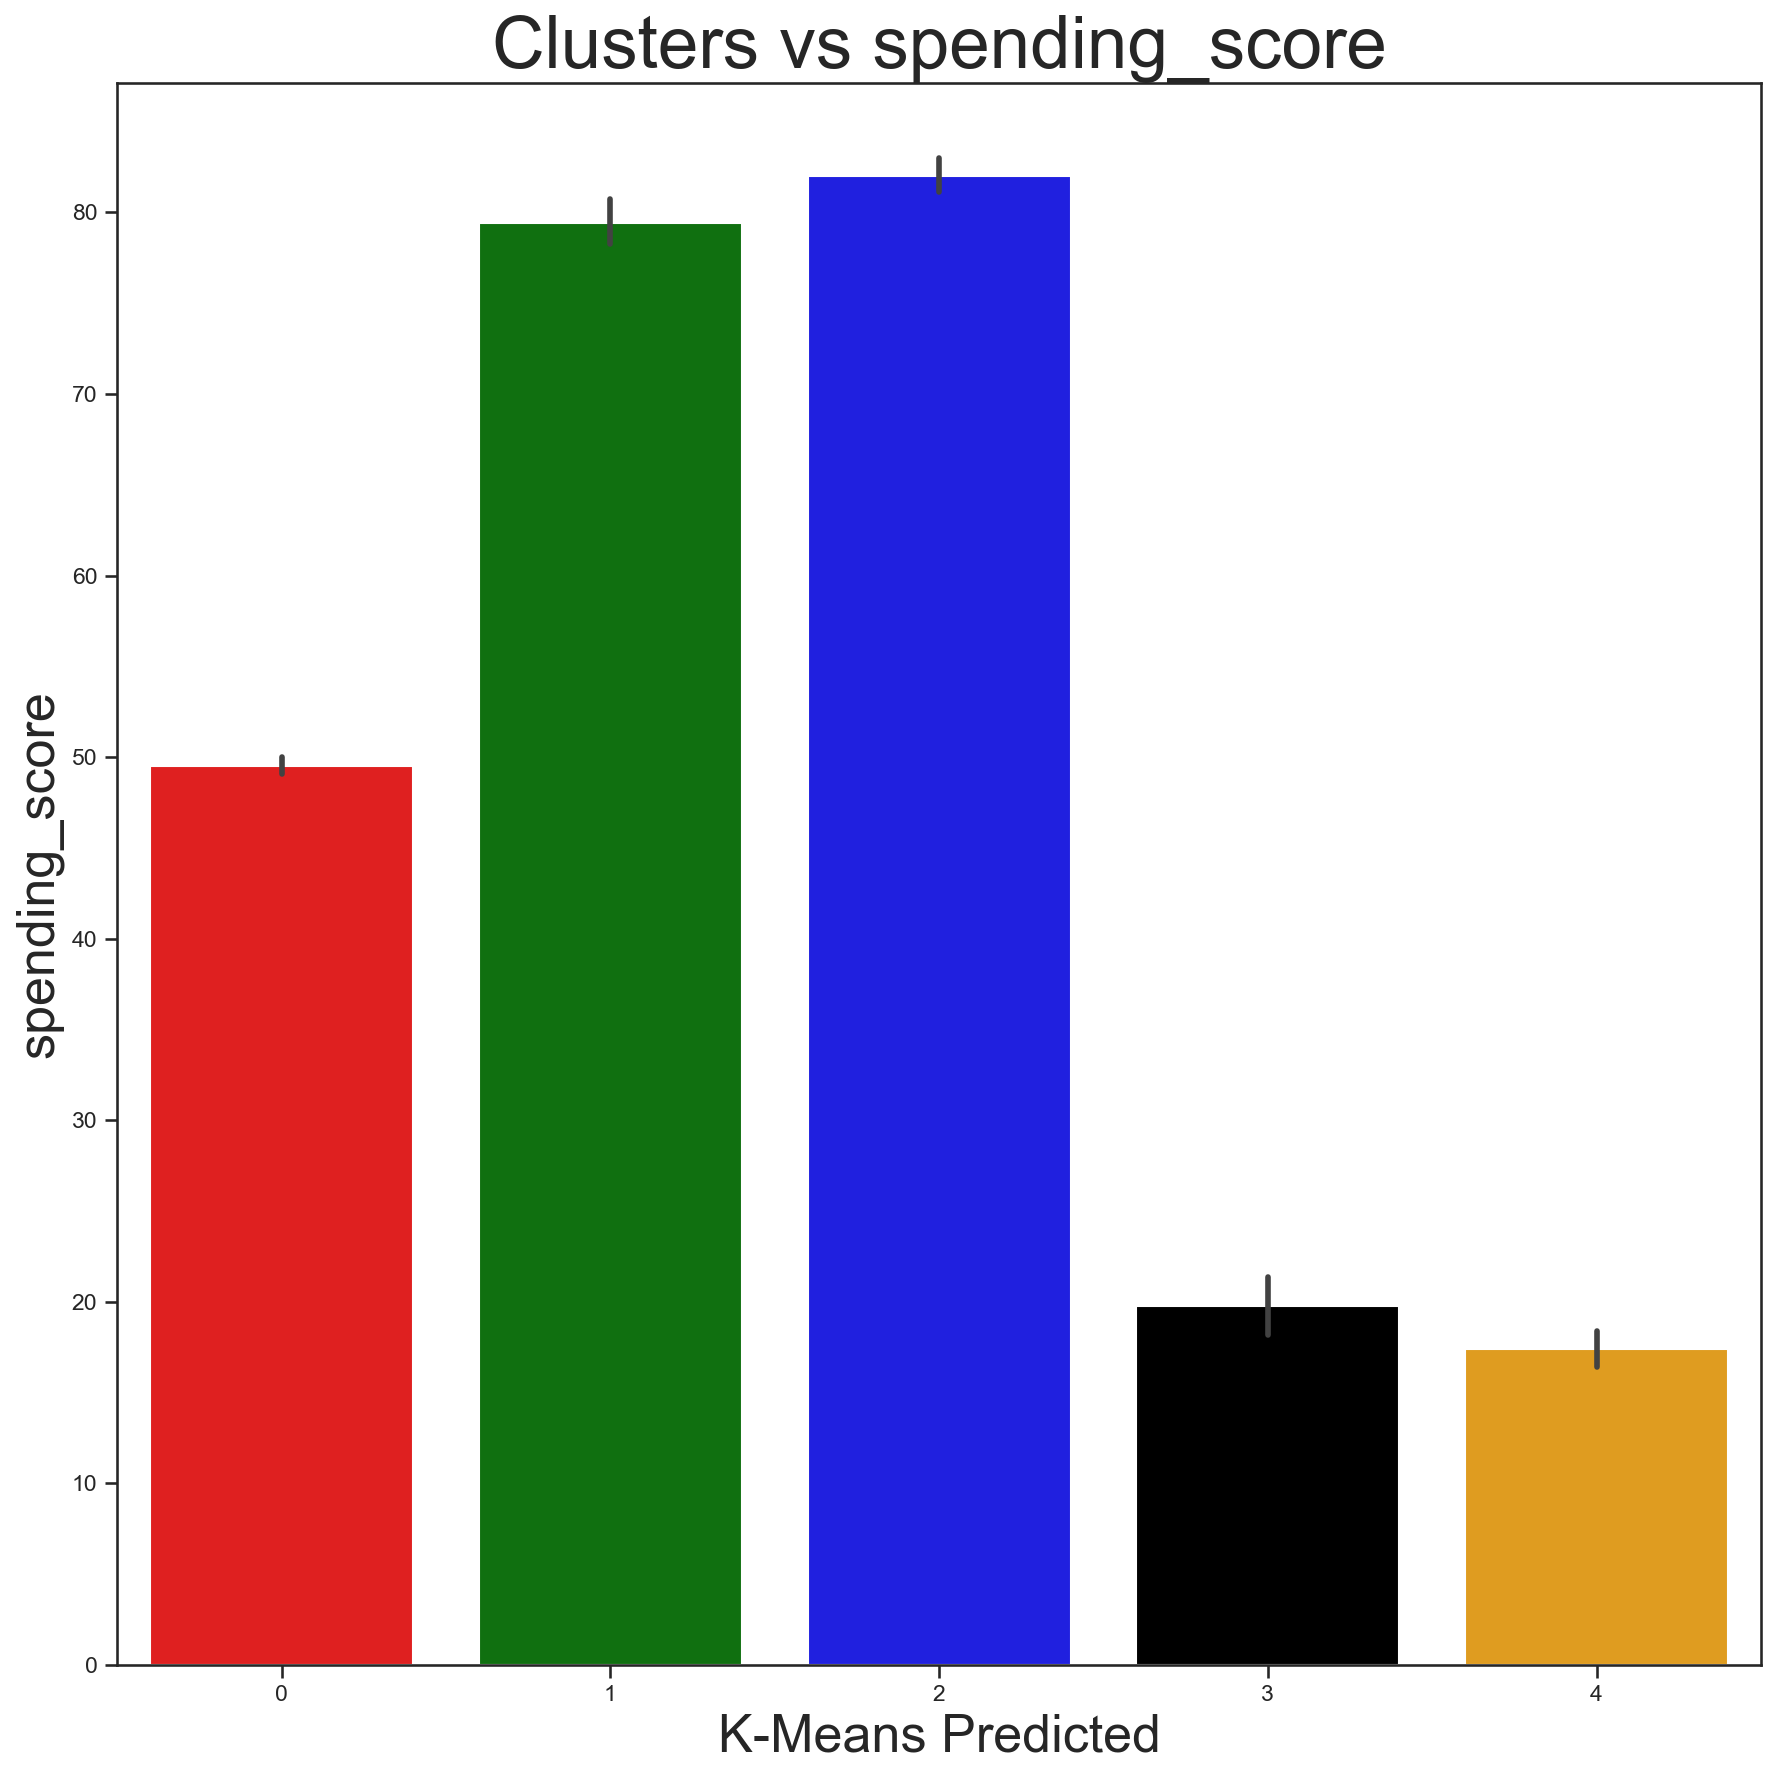

In [80]:
# Plot by spending score. 
plt.figure(figsize=(12, 12), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.xlabel('', fontsize=25),
plt.ylabel('', fontsize=25),
plt.title('Clusters vs spending_score', fontsize=35)
sns.barplot(x= 'K-Means Predicted', y='spending_score', data=x,
            palette=['red', 'green', 'blue', 'black', 'orange'])
plt.savefig('Clusters predicted bar 2')

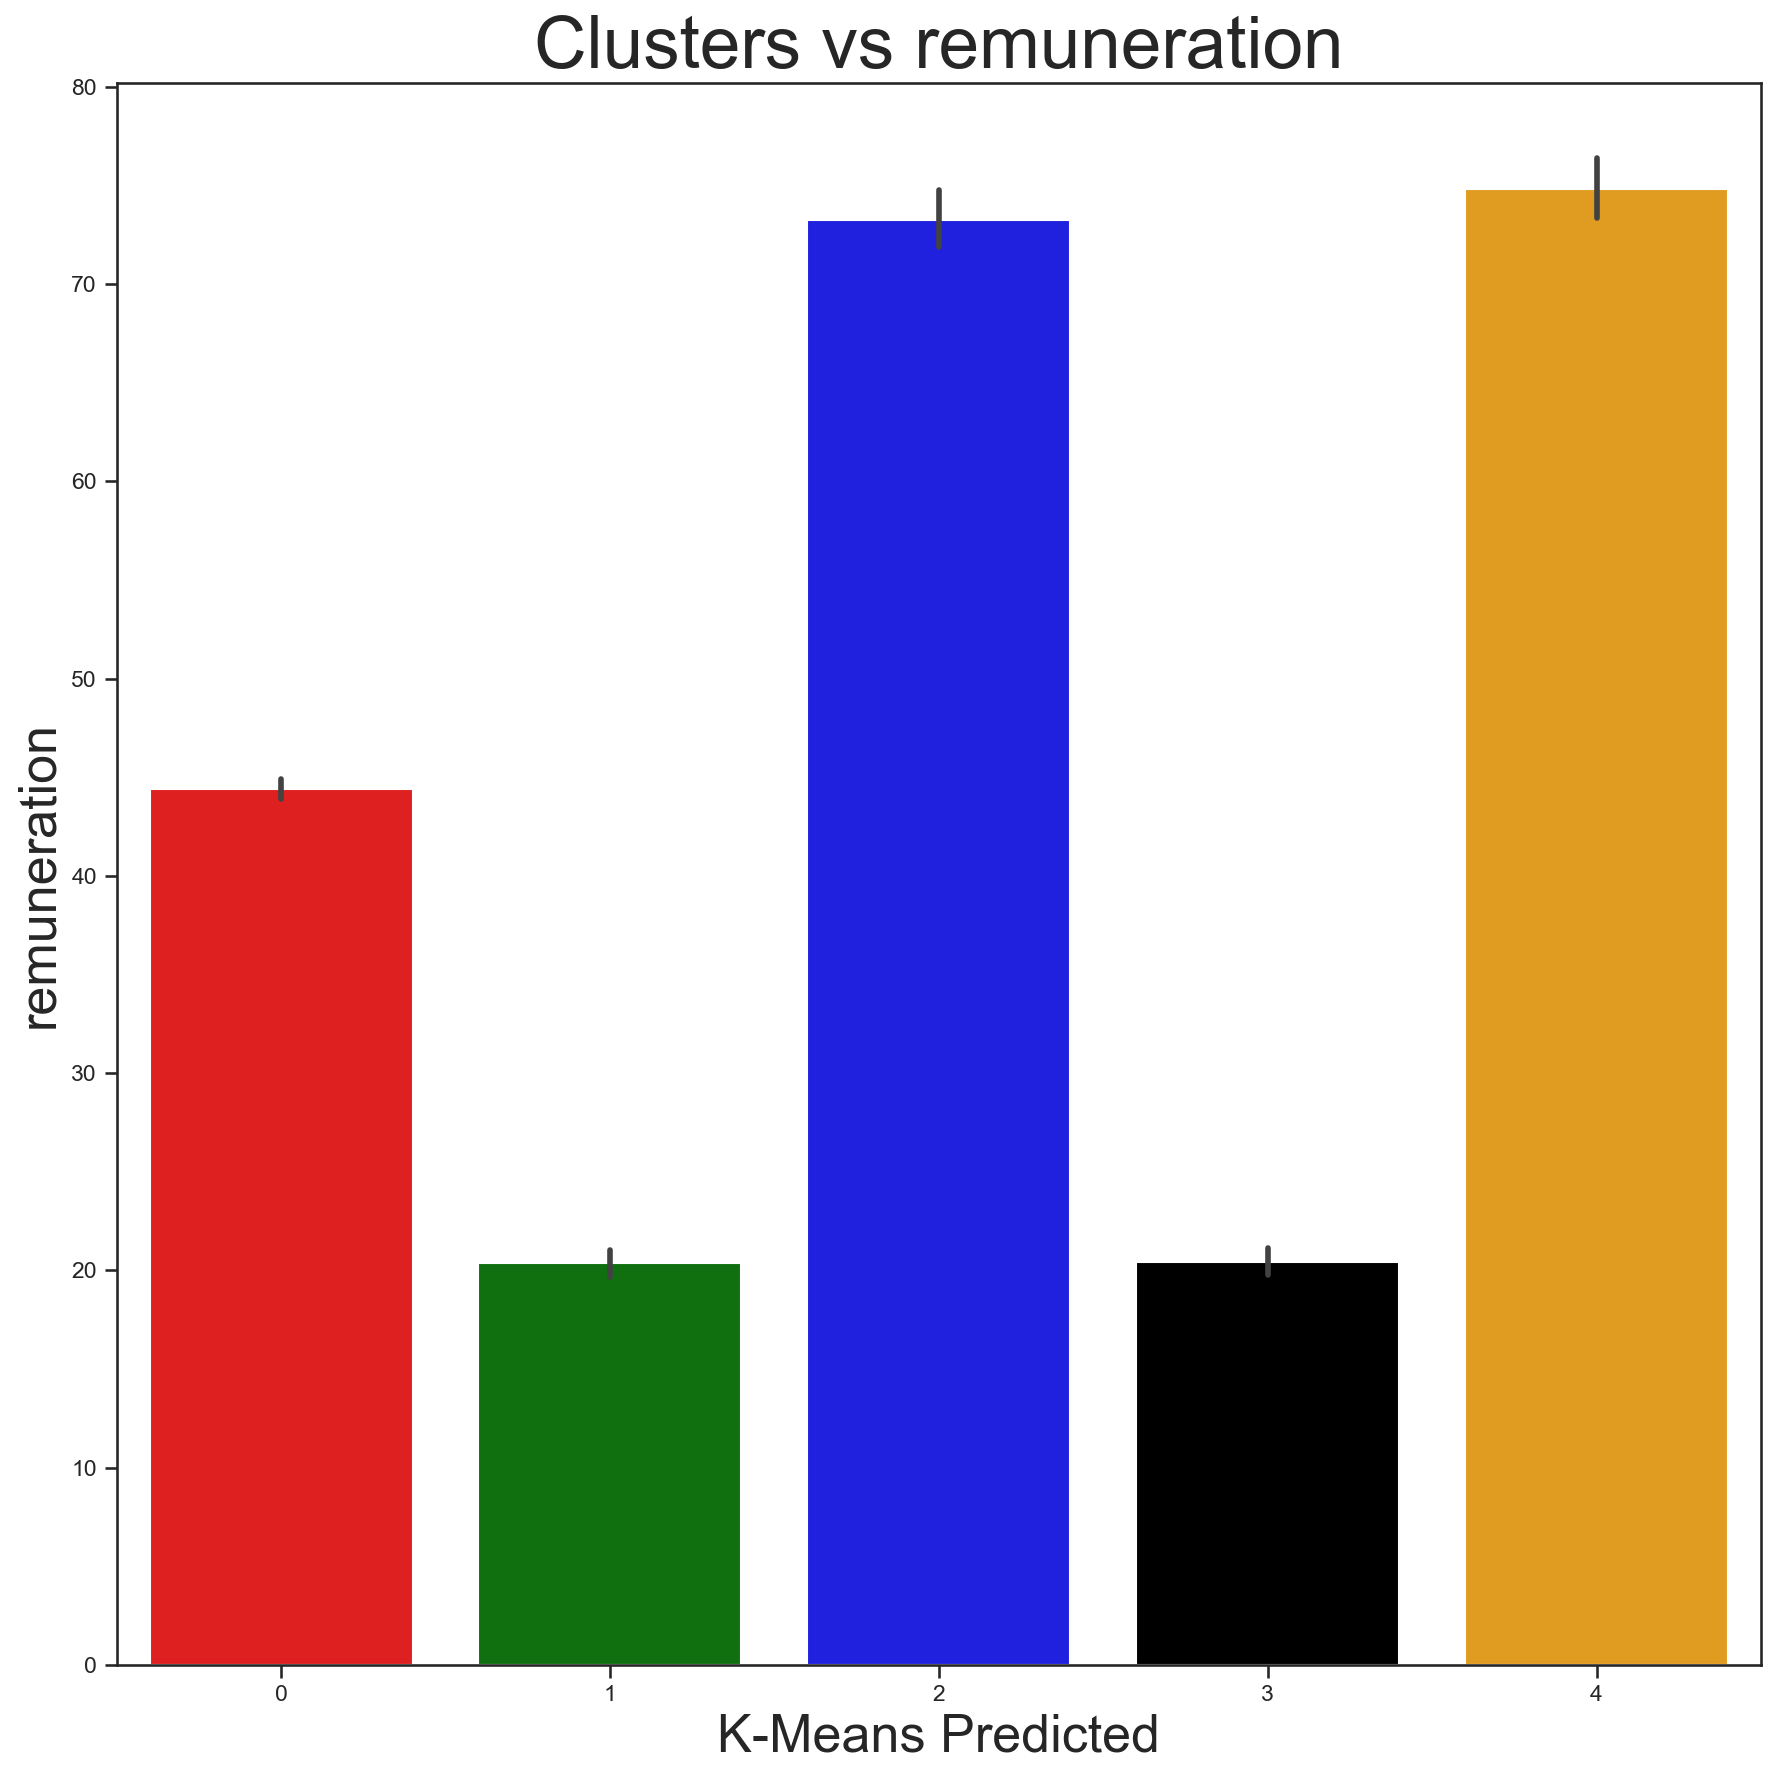

In [81]:
# Plot by remuneration. 
plt.figure(figsize=(12, 12), dpi=150)
plt.gcf().set_tight_layout(True)
sns.set_theme(style='ticks')
plt.xlabel('', fontsize=25),
plt.ylabel('', fontsize=25),
plt.title('Clusters vs remuneration', fontsize=35)
sns.barplot(x= 'K-Means Predicted', y='remuneration', data=x, palette=['red', 'green', 'blue', 'black', 'orange'])
plt.savefig('Clusters predicted bar 3')

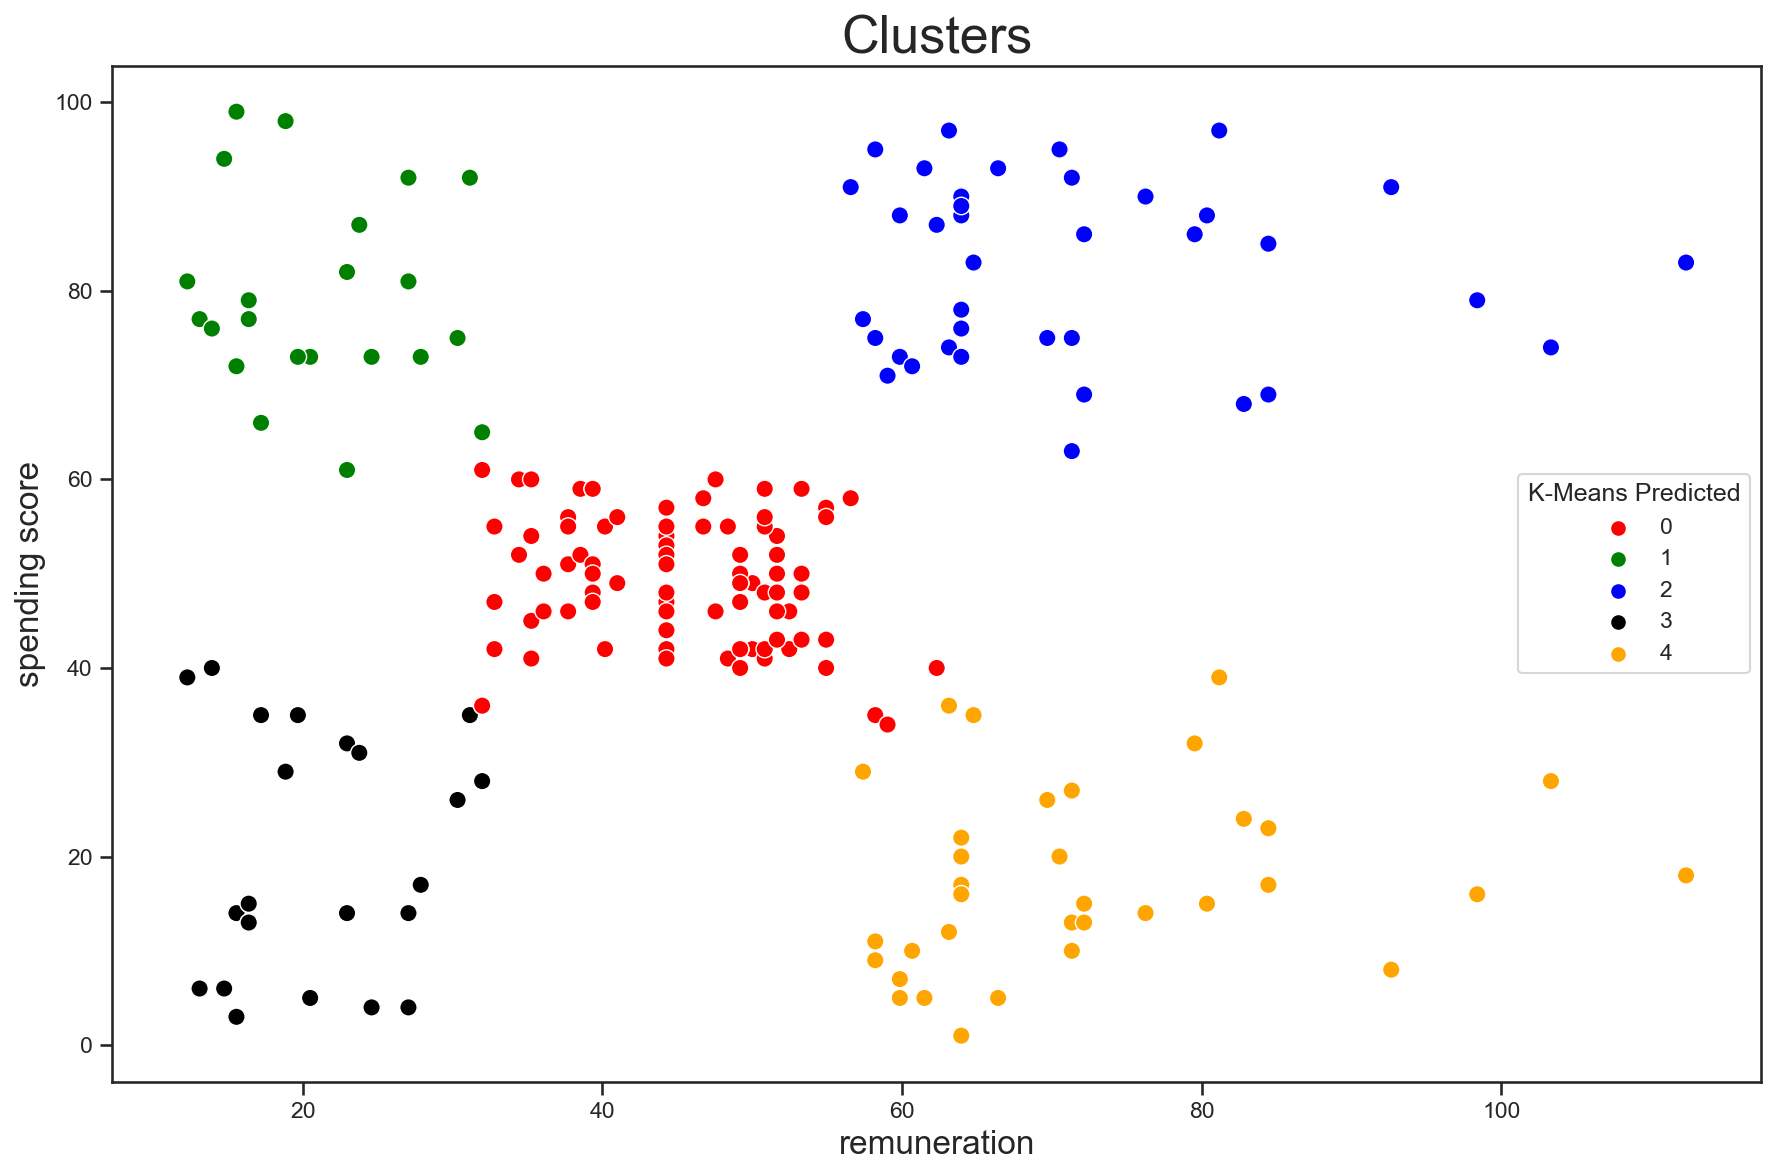

In [82]:
# Visualising predicted clusters.
plt.figure(figsize=(12, 8), dpi=150)
plt.gcf().set_tight_layout(True)
plt.title('Clusters', fontsize=25)
sns.set_theme(style='ticks')
plt.xlabel('remuneration', fontsize=16)
plt.ylabel('spending score', fontsize=16),
sns.set_theme(style="ticks", palette=None)
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , s=70,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.savefig('Clusters predicted')

## 7. Discuss: Insights and observations

# Summary: 
What are the clusters like? 
The five clusters are clearly visible not overlapping the five clusters work well with the data. The skewness of both variables creates a cluster, a small group of customers with high earning and loyalty points. Analysing this group further can be useful, why this group is differnt from those with high renumeration and lower loyalty points, is this related to age and other demographics or product categories. Other clusters can be important too. Targeted marketing can change the high earning customers with low loyalty points spend more.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [83]:
!pip install WordCloud

In [84]:
!pip install TextBlob

In [85]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Load the data set as df3.


# Import new CSV file with Pandas.
df3 =  pd.read_csv('reviews_clean.csv')

# View DataFrame.
df3.info()
df3.head()
# View DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [87]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender','age','remuneration','spending_score','loyalty_points','education','product'], axis=1)

# View DataFrame.
df3

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.   
2     Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyond me.  Most of one of them is all blue ocean.  Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these "kinds of adventures" rather than solely the specific adventure.  You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms.  So even just a list of new monsters or NPCs would at least be useful than the map.  Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd.  Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons scr

In [88]:
# Determine if there are any missing values.
df3.isna().any()

review     False
summary    False
dtype: bool

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [89]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             when it co

In [90]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1                                           another worthless dungeon master's screen from galeforce9
2                                                                     pretty, but also pretty useless
3                                                                                          five stars
4                                                                                          money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [91]:
# Replace all the punctuations in review column.
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head

<bound method NDFrame.head of 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [92]:
# Replace all the puncuations in summary column.
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head

<bound method NDFrame.head of 0       the fact that 50 of this space is wasted on art and not terribly informative or needed art 
1                                          another worthless dungeon masters screen from galeforce9
2                                                                    pretty but also pretty useless
3                                                                                        five stars
4                                                                                        money trap
                                                   ...                                             
1995                                                  the perfect word game for mixed ages with mom
1996                                                                                      super fun
1997                                                                                     great game
1998                                                                  

In [93]:
df3['summary'].value_counts()

five stars                                                          378
four stars                                                           57
great game                                                           22
fun                                                                  16
fun game                                                             14
                                                                   ... 
mud puppy puzzles                                                     1
throw it in your backpack                                             1
this is a very cute puzzle and i love the zipper bag for storage      1
all f the mudpuppy toys are wonderful                                 1
the perfect word game for mixed ages with mom                         1
Name: summary, Length: 1351, dtype: int64

### 2c) Drop duplicates in both columns

In [94]:
# Check the number of duplicate values in the COMMENTS column.
df3.summary.duplicated().sum()

649

In [95]:
# Check the number of duplicate values in the COMMENTS column.
df3.review.duplicated().sum()

# Drop duplicates in both columns.
review = df3.drop_duplicates(subset=['review'])
summary = df3.drop_duplicates(subset=['summary'])
# View DataFrame.
# df3.reset_index(inplace=True)
df3.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

## 3. Tokenise and create wordclouds

In [96]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tamas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
# Create new DataFrame (copy DataFrame).
df3_copy = df3


# View DataFrame.
df3_copy

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2     nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this s

In [98]:
# Apply tokenisation to both columns.
df3_copy['r_tokens'] = df3_copy['review'].apply(word_tokenize)
df3_copy['s_tokens'] = df3_copy['summary'].apply(word_tokenize)

In [99]:
print(df3_copy.head())

In [100]:
# Tokenise review.
review_tokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + df3_copy['r_tokens'][i]

review_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [101]:
review_tokens_str = ''
for value in review_tokens:
    review_tokens_str = review_tokens_str + value + ' '

In [102]:
# Review: Create a word cloud.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens_str) 

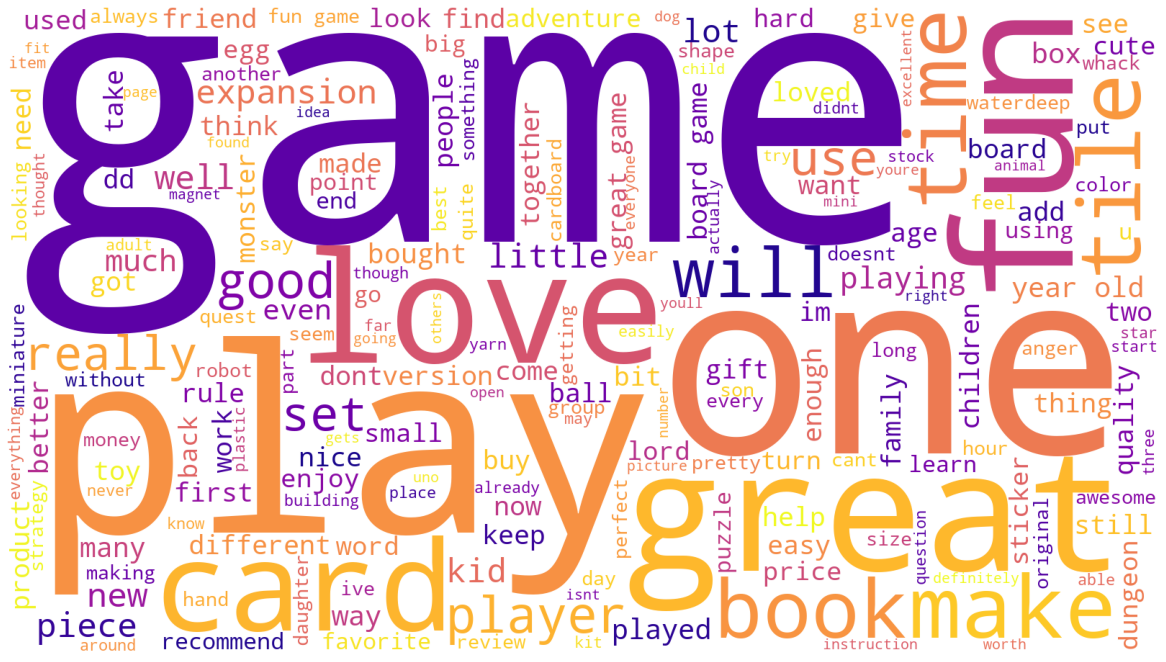

In [103]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud1')

In [104]:
# Repeat with the words from the summary column.
summary_tokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + df3_copy['s_tokens'][i]

summary_tokens


['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [105]:
summary_tokens_str = ''
for value in summary_tokens:
    summary_tokens_str = summary_tokens_str + value + ' '

In [106]:
# Review: Create a word cloud.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens_str) 

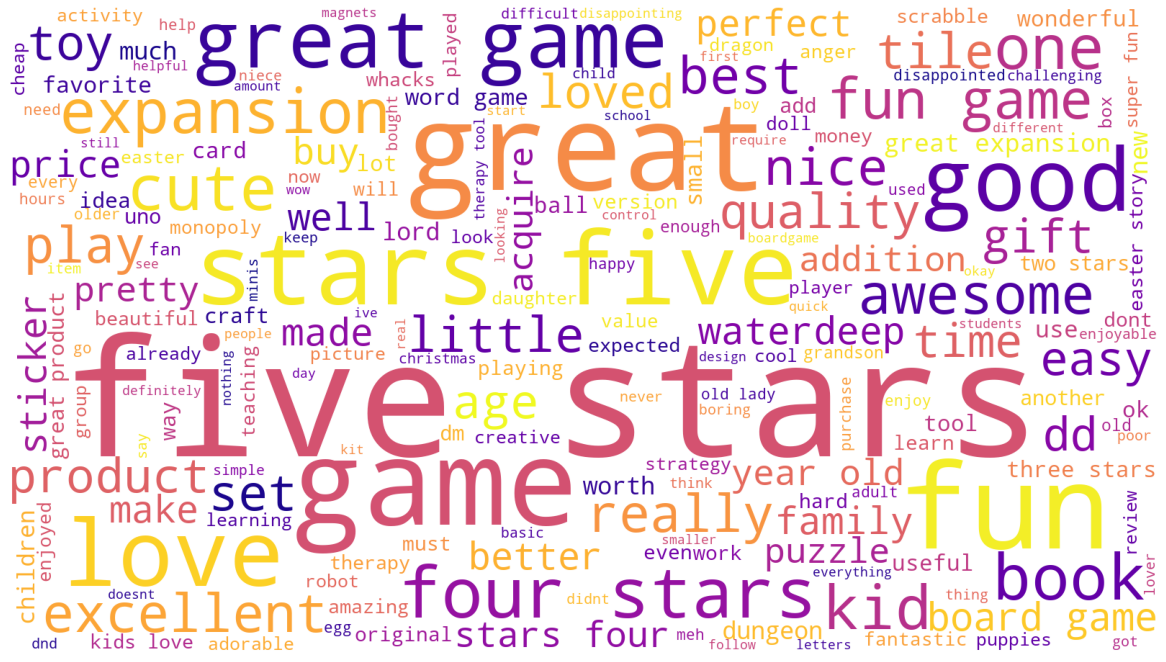

In [107]:
# Plot the WordCloud image for SUMMARY.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.savefig('wordcloud2 for summary')

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [108]:
# Determine the frequency distribution.
fdist_review = FreqDist(review_tokens)
fdist_review

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [109]:
# Determine the frequency distribution.
fdist_summary = FreqDist(summary_tokens)
fdist_summary

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [110]:
print(len(review_tokens))
print(len(summary_tokens))

112202
9359


In [111]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
review_tokens = [word for word in review_tokens if word.isalnum()]
summary_tokens = [word for word in summary_tokens if word.isalnum()]
print(len(review_tokens))
print(len(summary_tokens))


112194
9359


In [112]:
# Remove all the stopwords
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
review_tokens2 = [x for x in review_tokens if x.lower() not in english_stopwords]
summary_tokens2 = [x for x in summary_tokens if x.lower() not in english_stopwords]
# Define an empty string variable.
#summary_tokens2_string = ''

#for value in summary_tokens:
#    # Add each filtered token word to the string.
#    summary_tokens2_string = summary_tokens2_string + value + ' '
print(len(review_tokens2))
print(len(summary_tokens2))

57721
6216


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
# Sense check the tokens.
review_tokens2

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork

In [114]:
# Sense check the tokens.
summary_tokens2

['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'galeforce9',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'youre',
 'getting',
 'dont',
 'bother',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'five',
 'stars',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',

In [115]:
# Prepare review tokens for wordcloud.
review_tokens2_str = ''
for value in review_tokens2:
    review_tokens2_str = review_tokens2_str + value + ' '
len(review_tokens2_str)

382137

In [116]:
# Prepare summary tokens for wordcloud.
summary_tokens2_str = ''
for value in summary_tokens2:
    summary_tokens2_str = summary_tokens2_str + value + ' '
len(summary_tokens2_str)

39136

### 4c) Create wordcloud without stopwords

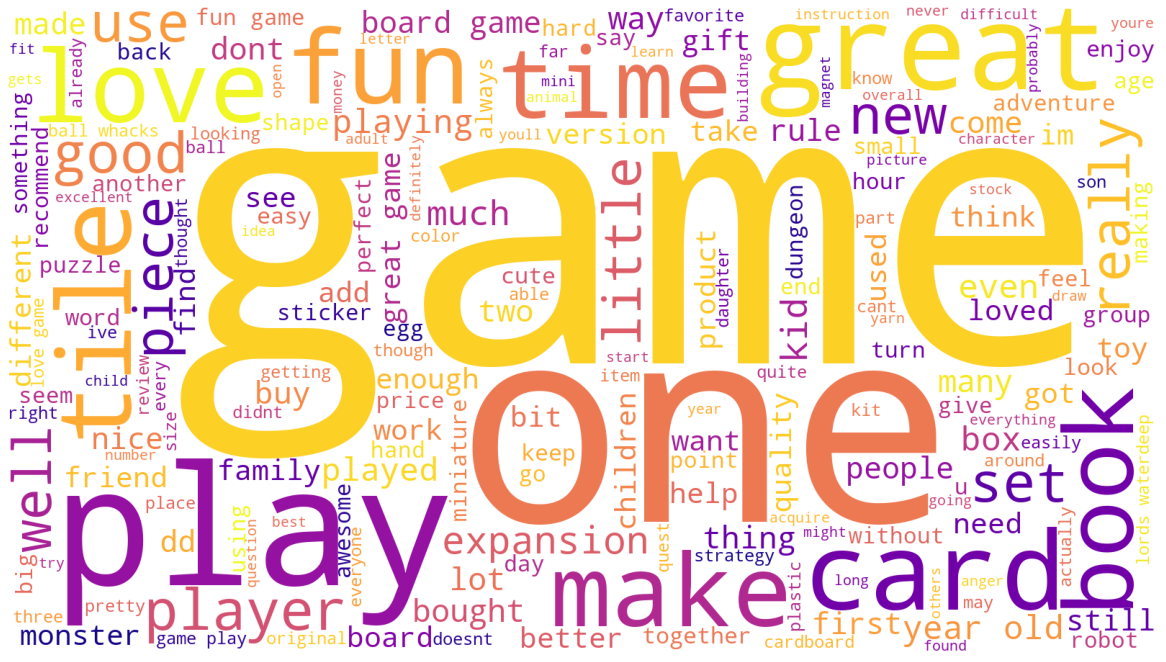

In [117]:
# Create a wordcloud without stop words for review.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens2_str) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

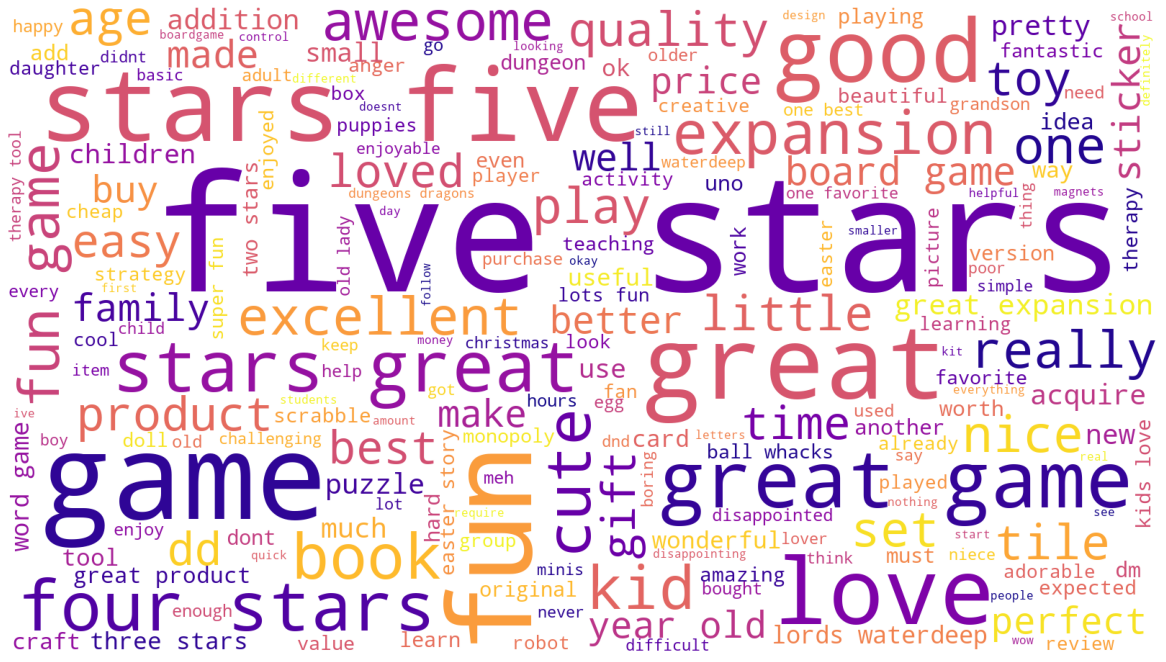

In [118]:
# Create a wordcloud without stop words for summary.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens2_str) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

### 4d) Identify 15 most common words and polarity

In [119]:
# Determine the 15 most common words in review.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(review_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts1.reset_index(level=0, inplace=True)
counts1

Word  Frequency
0     game       1685
1    great        596
2      fun        553
3      one        530
4     play        502
5     like        414
6     love        331
7   really        319
8      get        319
9    cards        301
10   tiles        297
11    good        294
12    time        291
13   would        280
14    book        273

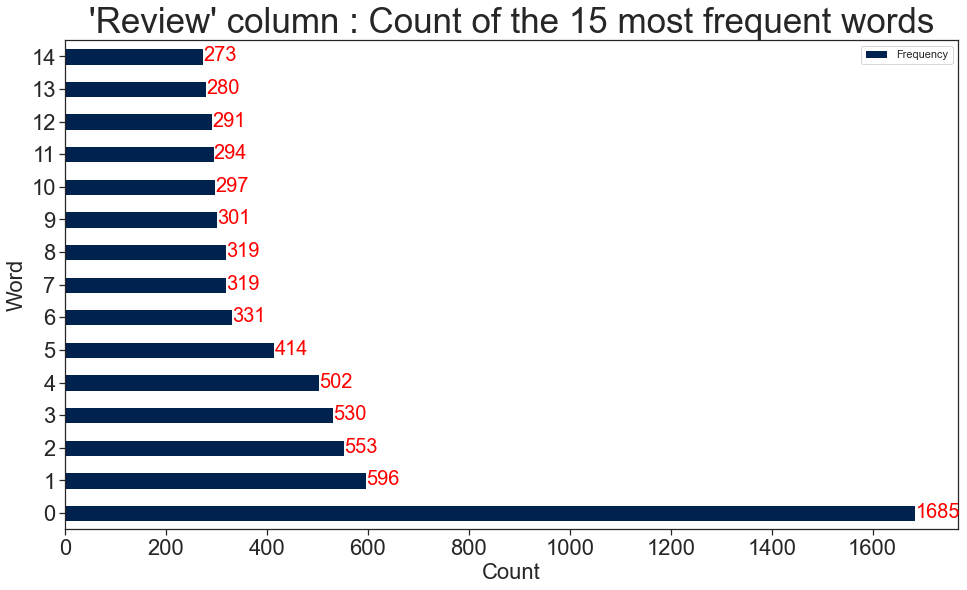

In [120]:
# Plot the most frequent words.
# Set the plot type.
ax = counts1.plot(kind='barh', figsize=(16, 9), fontsize=22,
                 colormap ='cividis')

# Set the labels.
ax.set_xlabel('Count', fontsize=22)
ax.set_ylabel('Word', fontsize=22)
ax.set_title("'Review' column : Count of the 15 most frequent words",
             fontsize=35)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=20, color='red')
plt.savefig('Most frequent words in review')

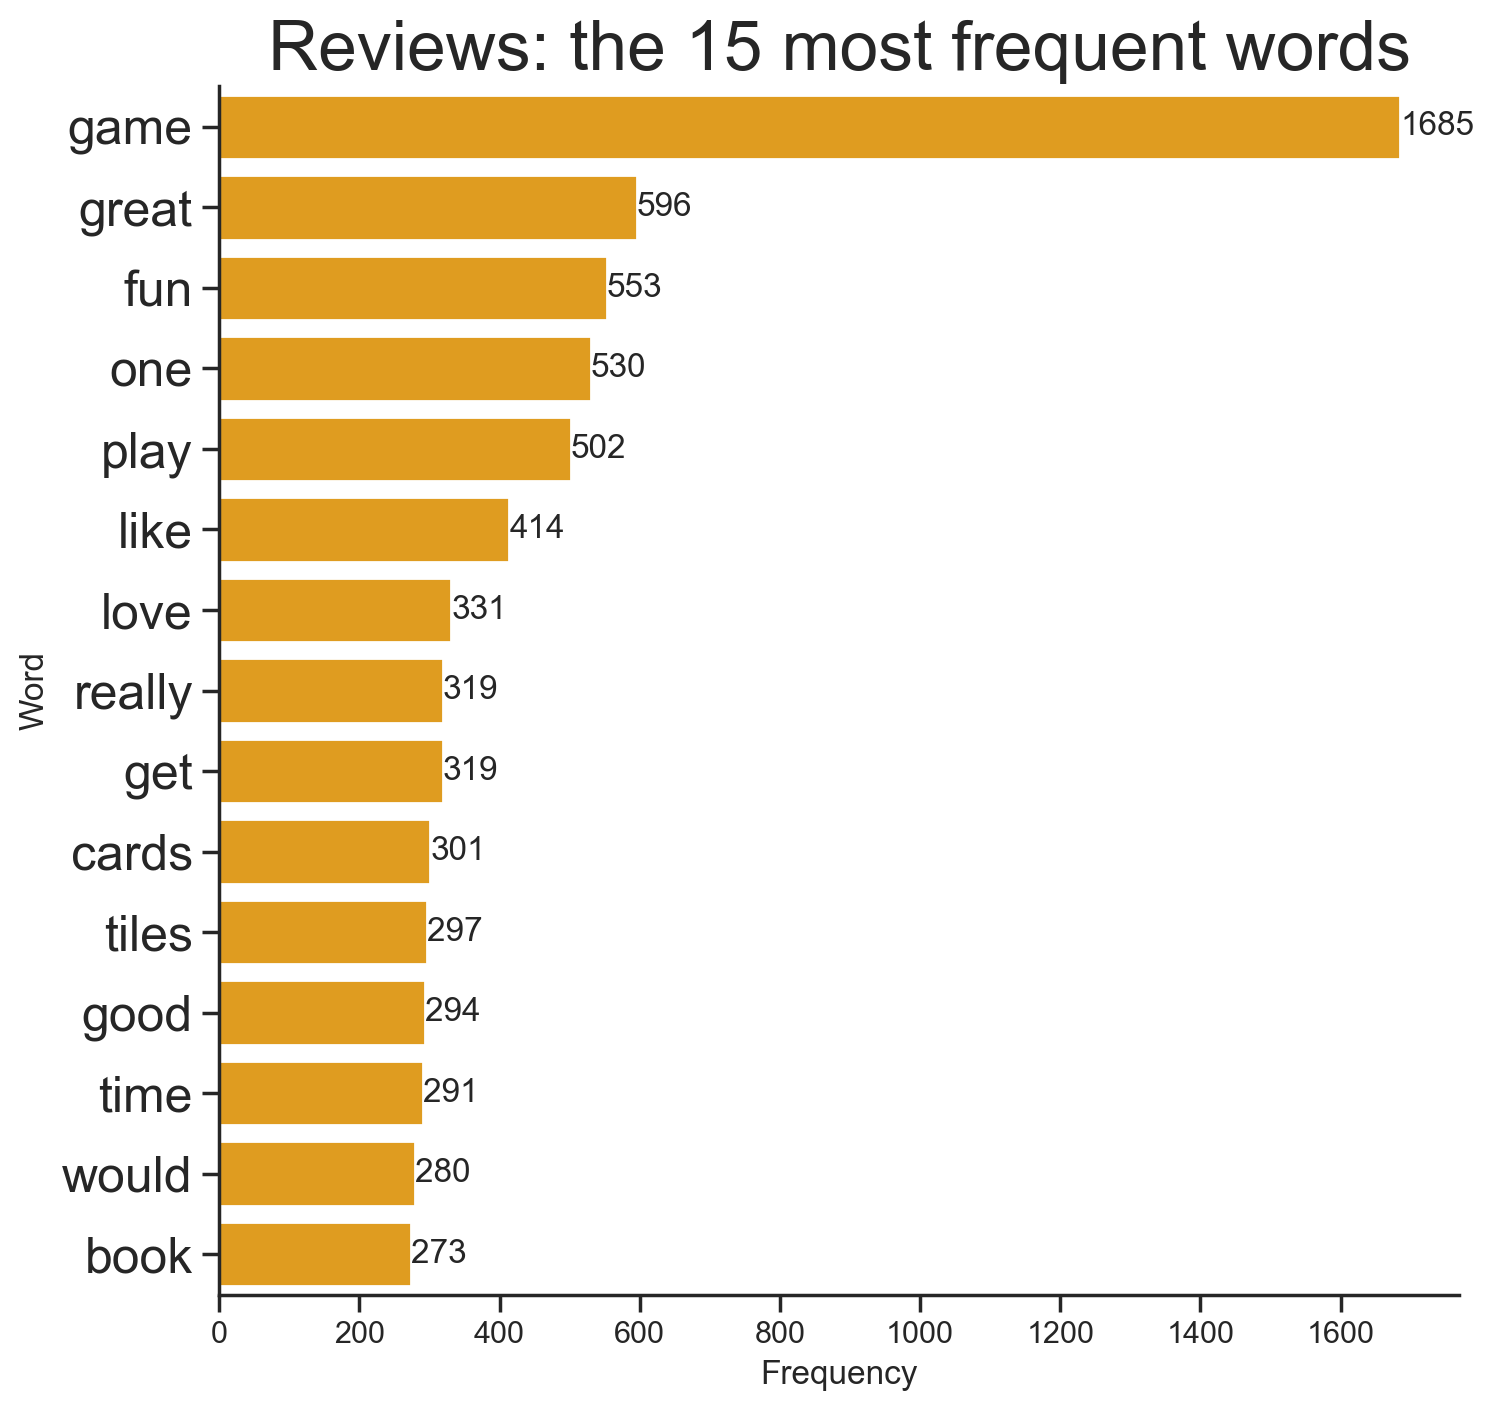

In [121]:
# Improving visualisation.
plt.figure(figsize=(8, 8), dpi=200)
plt.title("Reviews: the 15 most frequent words", fontsize=25)
plt.yticks(fontsize=18)
sns.set_theme(style='ticks')
ax = sns.barplot(x='Frequency', y='Word', data=counts1, color='orange')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
plt.savefig('barplot review word count')

In [122]:
# Determine the 15 most common words in summaries.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(summary_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts2.reset_index(level=0, inplace=True)
counts2

Word  Frequency
0       stars        466
1        five        381
2        game        319
3       great        295
4         fun        218
5        love         93
6        good         92
7        four         58
8        like         54
9   expansion         52
10       kids         50
11       cute         45
12       book         43
13        one         38
14    awesome         36

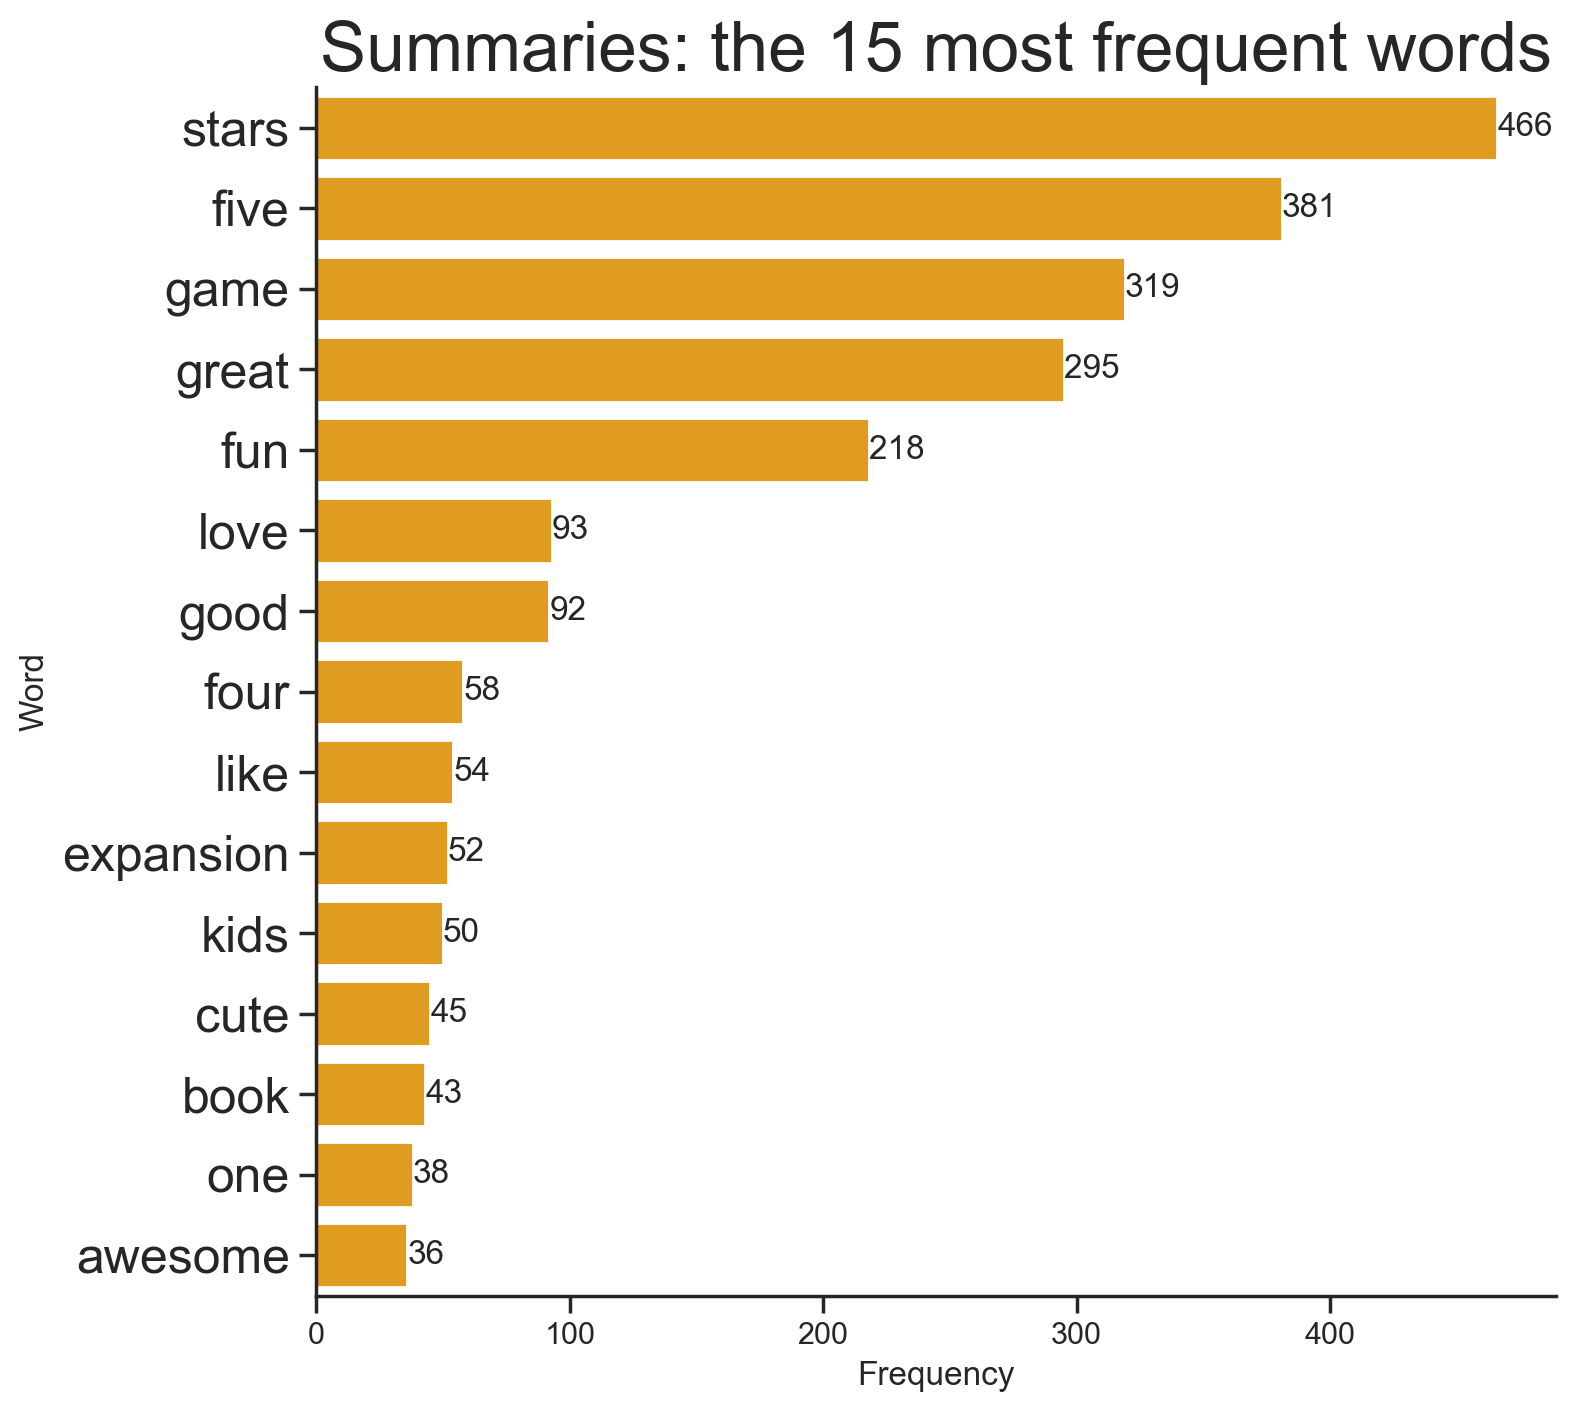

In [123]:
# Plot the most frequent words.
plt.figure(figsize=(8, 8), dpi=200)
plt.title("Summaries: the 15 most frequent words", fontsize=25)
sns.set_theme(style='ticks')
plt.yticks(fontsize=18)
ax = sns.barplot(x='Frequency', y='Word', data=counts2, color='orange')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
plt.savefig('Barplot summary word count')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [124]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [125]:
df3_copy['all_words']=df3_copy['review']+df3_copy['summary']
df3_copy.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

In [126]:
# Search for words in the dataframe.
words = ['Turtle','turtle','PS','ps3','Nintendo']
#df3_copy['Count'] 
word_count = (
    df3_copy['all_words'].str.split()
    .apply(Counter)
    .apply(lambda counts: sum([counts[word] for word in words])))
# sum(df3_copy['Count'])
sum(word_count)

# There is no mention of the brand.
# I also tried to add Nintendo or PS to see if there is anything about the products?

0

In [127]:
# Determine polarity of both columns. 
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df3_copy['polarity'] = df3_copy['all_words'].apply(generate_polarity)

# Preview the result.
df3_copy['polarity'].head()

0   -0.012500
1   -0.003855
2    0.105901
3    0.368182
4   -0.316667
Name: polarity, dtype: float64

In [128]:
# Polarity added to each observation.
df3_copy.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

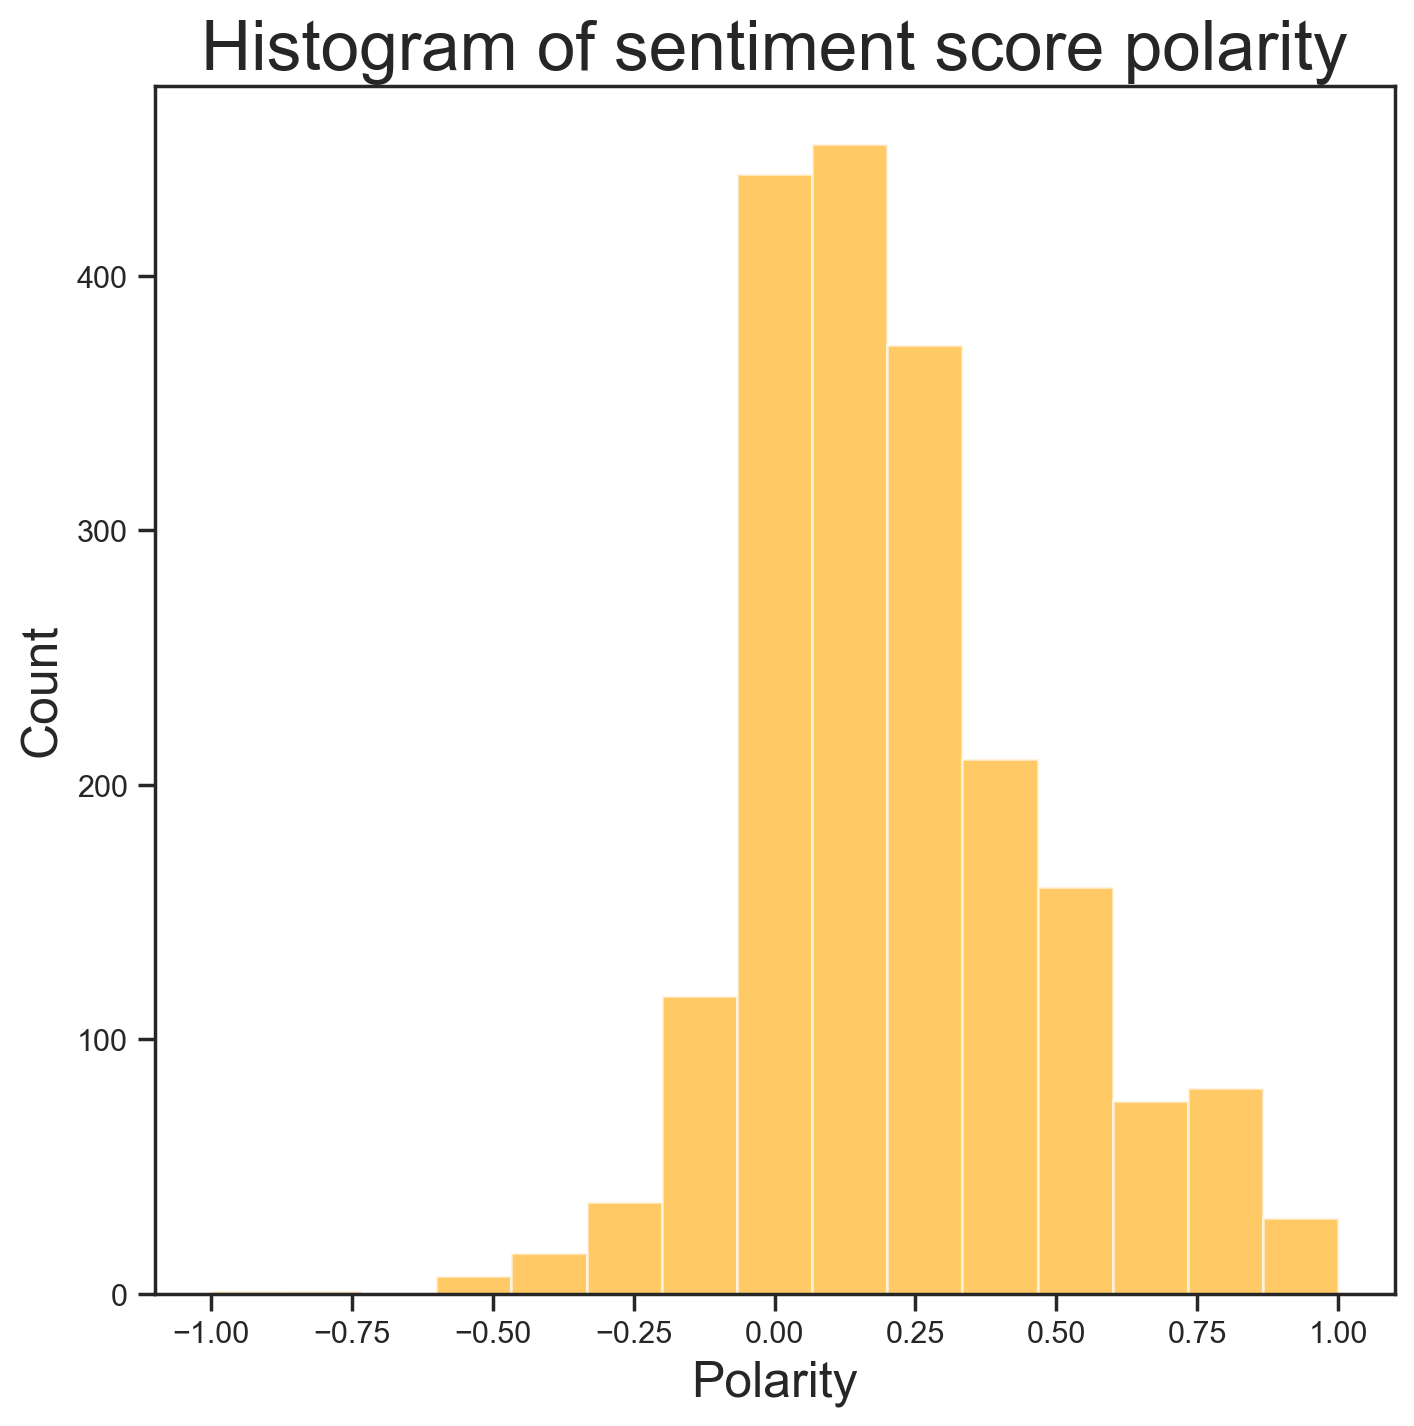

In [129]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(8, 8), dpi=200)
sns.set_theme(style='ticks')

# Define the bars.
n, bins, patches = plt.hist(df3_copy['polarity'], num_bins, facecolor='orange', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of sentiment score polarity', fontsize=25)
plt.savefig('sentiment vers 2')

## 6. Identify top 20  positive and negative comments, reviews and summaries respectively

In [130]:
# Top 20 negative comments based on the combination of the review and summary.

# Create a DataFrame.
negative_sentiment = df3_copy.nsmallest(20, 'polarity')
# View output.
negative_sentiment

review  \
208                                                                              booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
1804                                                                                                                                                          im sorry i just find this product to be boring and to be frank juvenile   
548                                                                     i am a therapist for children and this game is so valuable to bring out insight and solutions to deal with and identify feelings of anger i use it frequently   
117                                                                                                                         i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
227                                                                                                                                                                       this was a gift for my daughter i found it difficult to use   
290                                                                                                                                                                                            instructions are complicated to follow   
364   one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
1524                                                                                                                                                                                                       expensive for what you get   
1003                                                                                                              if you play dungeons and dragons then you will find this board game to be dumb and boring stick with the real thing   
538                                                                           i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through   
306                                                                                                                                                                                               very hard complicated to make these   
406                                                                                                                                                                              this game is extremely boring and takes far too long   
178                                                                                                                         at age 31 i found these very difficult to make i cant imagine how an 8 year old would do it by themselves   
437                                                                  this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities   
497                                                                                                                                    my son loves playing this game it was recommended by a counselor at school that works with him   
790                                                                                                                                                                                                                           perfect   
803                                                                                                                                                                                                              this game is a blast   
989                          

In [131]:
# Top 20 positive comments based on the combination of the review and summary.

# Create a DataFrame.
positive_sentiment = df3_copy.nlargest(20, 'polarity')

# View output.
positive_sentiment

review  \
7                                                                  came in perfect condition   
165                                                                             awesome book   
194                                                                             awesome gift   
496                                    excellent activity for teaching selfmanagement skills   
524                                                              perfect just what i ordered   
591                                                                        wonderful product   
609                                                                       delightful product   
621                                wonderful for my grandson to learn the resurrection story   
984                                                                           wonderful game   
1028                                              include all items  got the package quickly   
1135                                                                             awesome set   
1168                                                    best set buy 2 if you have the means   
1177                                                    awesome addition to my rpg gm system   
1309                                                           awesome worker placement game   
1383                                                                            awesome game   
1401                                      one of the best board games i played in along time   
1550                                my daughter loves her stickers awesome seller thank you    
1577                                                                            awesome game   
1609  this was perfect to go with the 7 bean bags  i just wish they were not separate orders   
1715                                                                             awesome toy   

                       summary  \
7                   five stars   
165                 five stars   
194                 five stars   
496                 five stars   
524                 five stars   
591                 five stars   
609                 five stars   
621                 five stars   
984                 five stars   
1028           one of the best   
1135                five stars   
1168                five stars   
1177                five stars   
1309                five stars   
1383                five stars   
1401                five stars   
1550  awesome seller thank you   
1577                five stars   
1609                five stars   
1715                five stars   

                                                                                                      r_tokens  \
7                                                                               [came, in, perfect, condition]   
165                                                                                            [awesome, book]   
194                                                                                            [awesome, gift]   
496                                               [excellent, activity, for, teaching, selfmanagement, skills]   
524                                                                          [perfect, just, what, i, ordered]   
591                                                                                       [wonderful, product]   
609                                                                                      [delightful, product]   
621                                        [wonderful, for, my, grandson, to, learn, the, resurrection, story]   
984                                                                                          [wonderful, game]   
1028                                                         [include, all, items, got, the, package, quickly]   
1135                                                                                            [awe

In [132]:
# Populate two new columns with polarity scores for each summary and review separately.
df3_copy['polarity_review'] = df3_copy['review'].apply(generate_polarity)
df3_copy['polarity_summary'] = df3_copy['summary'].apply(generate_polarity)

In [133]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_reviews = df3_copy.nsmallest(20, 'polarity_review')
negative_sentiment_reviews.drop(['r_tokens','s_tokens','polarity','all_words','polarity_summary'],
                                  axis=1, inplace=True)
negative_sentiment_reviews

review  \
208                                                                                                                                                                booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
182                                                                                                                                                                                                                                                                                   incomplete kit very disappointing   
1804                                                                                                                                                                                                                                            im sorry i just find this product to be boring and to be frank juvenile   
364                                                                                     one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
117                                                                                                                                                                                                           i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
227                                                                                                                                                                                                                                                         this was a gift for my daughter i found it difficult to use   
230                                                                                                                                                                                                                                                                                    i found the directions difficult   
290                                                                                                                                                                                                                                                                              instructions are complicated to follow   
301                                                                                                                                                                                                                                                                                                           difficult   
1524                                                                                                                                                                                                                                                                                         expensive for what you get   
174   i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed   
347                                                                                                      my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed   
538                                                                                                                                                             i purchased this on the recommendation of two ther

In [134]:
# Top 20 positive reviews
# Create a DataFrame.
positive_sentiment_reviews = df3_copy.nlargest(20, 'polarity_review')
positive_sentiment_reviews.drop(['r_tokens','s_tokens','polarity','all_words','polarity_summary'], axis=1, inplace=True)
positive_sentiment_reviews

review  \
7                                                                  came in perfect condition   
165                                                                             awesome book   
194                                                                             awesome gift   
496                                    excellent activity for teaching selfmanagement skills   
524                                                              perfect just what i ordered   
591                                                                        wonderful product   
609                                                                       delightful product   
621                                wonderful for my grandson to learn the resurrection story   
790                                                                                  perfect   
933                                                                                  awesome   
1037                                                                                 awesome   
1135                                                                             awesome set   
1168                                                    best set buy 2 if you have the means   
1177                                                    awesome addition to my rpg gm system   
1301                                                                             its awesome   
1401                                      one of the best board games i played in along time   
1550                                my daughter loves her stickers awesome seller thank you    
1609  this was perfect to go with the 7 bean bags  i just wish they were not separate orders   
1715                                                                             awesome toy   
1720                    it is the best thing to play with and also mind blowing in some ways   

                       summary  polarity_review  
7                   five stars              1.0  
165                 five stars              1.0  
194                 five stars              1.0  
496                 five stars              1.0  
524                 five stars              1.0  
591                 five stars              1.0  
609                 five stars              1.0  
621                 five stars              1.0  
790                aquire game              1.0  
933                 five stars              1.0  
1037                five stars              1.0  
1135                five stars              1.0  
1168                five stars              1.0  
1177                five stars              1.0  
1301                five stars              1.0  
1401                five stars              1.0  
1550  awesome seller thank you              1.0  
1609                five stars              1.0  
1715                five stars              1.0  
1720               three stars              1.0

In [135]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summaries = df3_copy.nsmallest(20, 'polarity_summary')
negative_sentiment_summaries.drop(['r_tokens','s_tokens','polarity','all_words','polarity_review'], axis=1, inplace=True)
# View output.
negative_sentiment_summaries

review  \
21                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your    
208                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
829                                                                                                                                                                                                                                                                              ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainl

In [136]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_summaries = df3_copy.nlargest(20, 'polarity_summary')
positive_sentiment_summaries.drop(['r_tokens','s_tokens','polarity','all_words','polarity_review'], axis=1, inplace=True)
# View output.
positive_sentiment_summaries

review  \
6                                                                                                                                                                                                                                                                                                                                                                          i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need  and no crap filler on it very happy with this screen   
28                                                                                                                                                                                                                                                                                                                                                                                      these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity   
32                                                                                                                                                                                                                                                                                                                                                                                                                                                        awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these   
80                                                                                                                                                                                                                                                                                                                                                             my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else   
134                                                                                                                                                                                                                             this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler   
140                                                                                                                                                                                                                                                  i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it   
161                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             my 8 year old son loves this drawing book loves it   
163                                                                                                                                         

## 7. Discuss: Insights and observations
The review and summary columns were combined and the overall sentiment was measured with the columns combined together. On the other hand, the top 20 worst and best was listed for the combined data and for each of the two columns separately too.

Strangely enough, the word Turtle does not appear in any comment. This can be investigated to improve the brand. While, this could also indicate that comments rather evaluate the product and not the sentiment towards Turtle Games. 

This quick analysis is one of the more simple ones and there are more advanced models to use. The approach will depend on consultation with the stakeholders. The analysis should be reviewed with more advanced models but this one already shows what can be achieved even with simple tools.

According to the results the overall sentiment looks really good, this can be seen on the histogram of sentiment score primarily. Then all other value count and wordcloud visualisation show mostly positive result too. The only negative comments can be analysed when looking at the comments with the lowest sentiment  score. I tried to spot check the results but I did not find any anomaly, most of the comments I read were more or less interpreted correctly. The limitations could be noticed. The word 'game' might not indicate strong positive sentiment on its own. It was informative and engaging
to explore the two different columns, allowing comparison.